# Dataset Description

### Dataset download link: https://archive.ics.uci.edu/static/public/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

<h2>Information</h2>

Additional Information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

# Import Neccessary Libraries

In [1]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load the data

In [3]:
data = pd.read_csv('/storage/emulated/0/project_data/ObesityDataSet_raw_and_data_sinthetic.csv')
data2 = pd.read_csv('/storage/emulated/0/project_data/ObesityDataSet_raw_and_data_sinthetic.arff',sep=';')

# View the data

In [4]:
data.head(10)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6  3.0  Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7  3.0  Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8  3.0  Sometimes    no   2.0   no  1.0  1.0  Frequently   
9  3.0  Sometimes    no   2.0   no  1.0  1.0          no   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  
5             Automobile        Normal_Weight  
6              Motorbike        Normal_Weight  
7  Public_Transportation        Normal_Weight  
8  Public_Transportation        Normal_Weight  
9  Public_Transportation        Normal_Weight

# Data Features Names

In [5]:
# Transpose the data feature names
data2.T

0     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute Gender {Female,Male}   

                                                                      1     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute Age numeric   

                                                                         2     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute Height numeric   

                                                                         3     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute Weight numeric   

                                                                                                 4     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute family_history_with_overweight {yes...   

                                                                        5     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute FAVC {yes,no}   

                                                                       6     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute FCVC numeric   

                                                                      7     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute NCP numeric   

                                                                                                8     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute CAEC {no,Sometimes,Frequently,Always}   

                                                                         9     \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute SMOKE {yes,no}   

                                                                       10    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute CH2O numeric   

                                                                       11    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute SCC {yes,no}   

                                                                      12    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute FAF numeric   

                                                                      13    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute TUE numeric   

                                                                                                14    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute CALC {no,Sometimes,Frequently,Always}   

                                                                                                 15    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute MTRANS {Automobile,Motorbike,Bike,P...   

                                                                                                 16    \
@relation obeyesdad-weka.filters.supervised.ins...  @attribute NObeyesdad {Insufficient_Weight,Nor...   

                                                     17    \
@relation obeyesdad-weka.filters.supervised.ins...  @data   

                                                                                                 18    \
@relation obeyesdad-weka.filters.supervised.ins...  Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no...   

                                                                                                 19    \
@relation obeyesdad-weka.filters.supervised.ins...  Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,y...   

                                                                                                 20    \
@relation obeyesdad-weka.filters.supervised.ins...  Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,...   

                                                                                                 21    \
@relation obeyesdad-weka.filters.supervised.ins...  Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0...   

                                                                                                 22    \
@relation obeyesdad-weka.f

# Data Description

Gender: Indicates the gender of the individual (e.g., Male or Female).

Age: Represents the age of the individual in years.

Height: Refers to the height of the individual in centimeters.

Weight: Denotes the weight of the individual in kilograms.

family_history_with_overweight: Indicates whether the individual has a family history of overweight or not (e.g., yes or no).

FAVC: Stands for "Frequent consumption of high-caloric food." It represents whether the individual frequently consumes high-caloric food or not (e.g., yes or no).

FCVC: Represents the "Frequency of consumption of vegetables." It indicates the frequency of vegetable consumption by the individual, typically measured on a scale.

NCP: Stands for "Number of main meals per day." It denotes the number of main meals the individual consumes in a day.

CAEC: Represents the "Consumption of food between meals." It indicates the frequency of food consumption between meals by the individual, typically measured on a scale.

SMOKE: Indicates whether the individual smokes or not (e.g., yes or no).

CH2O: Represents the "Daily consumption of water." It denotes the daily amount of water consumed by the individual, typically measured in liters.

SCC: Stands for "Calories consumption monitoring." It indicates whether the individual monitors their calorie consumption or not (e.g., yes or no).

FAF: Represents the "Physical activity frequency." It denotes the frequency of physical activity by the individual, typically measured on a scale.

TUE: Stands for "Time using technology devices." It indicates the time spent by the individual using technology devices (e.g., smartphones, computers) per day.

CALC: Represents the "Consumption of alcohol." It indicates the frequency of alcohol consumption by the individual, typically measured on a scale.

MTRANS: Stands for "Transportation used." It represents the mode of transportation used by the individual (e.g., car, bike, public transportation, walking).

NObeyesdad: Refers to the "Obesity level" and is the target variable. It categorizes individuals into different obesity levels based on their eating habits and physical condition. The exact categories or labels are not provided in the information you shared.

In [6]:
# View data columns
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [55]:
# View data rows
data.index

RangeIndex(start=0, stop=2111, step=1)

In [56]:
#  view the shape of the data
print(f' Data shape:{data.shape}')

# View data dimension
print(f' Data Dimension:{data.ndim}')

 Data shape:(2111, 17)
 Data Dimension:2


# View Data Class

## Class Percentage

In [57]:
# class frequency
value_counts = data['NObeyesdad'].value_counts()
# Calculate percentages
percentages = (value_counts / len(data['NObeyesdad'])) * 100
percentages

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: NObeyesdad, dtype: float64

## Class frequency

In [58]:
# count the class frequency
value_counts = data['NObeyesdad'].value_counts()
value_counts

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

The classes almost balance for our task

# Descriptive Statistics

In [71]:
# Descriptive Statistics for the numeric features
display(data.describe())

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

# Analysing the Outliers in the data

To identify outliers in the data, we typically look for values that are significantly different from the majority of the observations. Outliers can occur due to various reasons such as measurement errors, data entry mistakes, or genuine extreme values. Let's analyze each variable to understand the potential outliers:

Age: Since the minimum and maximum ages are 14 and 61, respectively, any values below 14 or above 61 could be considered outliers. However, without further context or domain knowledge, it is difficult to determine if these values are genuine outliers or represent a specific subset of the population.

Height: Similarly, without specific context, it is challenging to identify outliers in height. The range of heights seems reasonable, with the minimum being 1.45 meters and the maximum being 1.98 meters.

Weight: Similarly to height, it is challenging to identify outliers in weight without additional context. The minimum weight is 39 kg, and the maximum weight is 173 kg.

FCVC: Since FCVC represents the frequency of vegetable consumption, values outside the range of 1 to 3 could potentially be outliers. However, it depends on the specific context and the nature of the dataset. Without further information, it is difficult to determine if these values are genuine outliers or represent a valid subset of the data.

NCP: The number of main meals consumed daily can range from 1 to 4. Values outside this range could be considered outliers, but it is essential to consider the specific context and potential factors that could influence the number of meals consumed.

CH2O: The consumption of water daily can range from 1 to 3. Values outside this range could be potential outliers, but further analysis is required to determine their validity.

FAF: Physical activity frequency can range from 0 to 3. Values outside this range could be considered outliers, but it depends on the specific context and the nature of the dataset.

TUE: Time using technology devices daily can range from 0 to 2. Values outside this range could be potential outliers, but further analysis is necessary to determine their validity.

To make a more informed determination of outliers, it is essential to consider the specific context, domain knowledge, and potentially conduct further statistical analysis or consult with subject matter experts.

In [60]:
# Descriptive statistics for the categorical data
data.describe(include='O')

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351

In [61]:
# check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# Check Missing Values

In [62]:
# count missing values
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There are no missing values

# Check for Unique Values

In [63]:
# Unique values
data.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

# Data Visualiazation

### Class Percentage

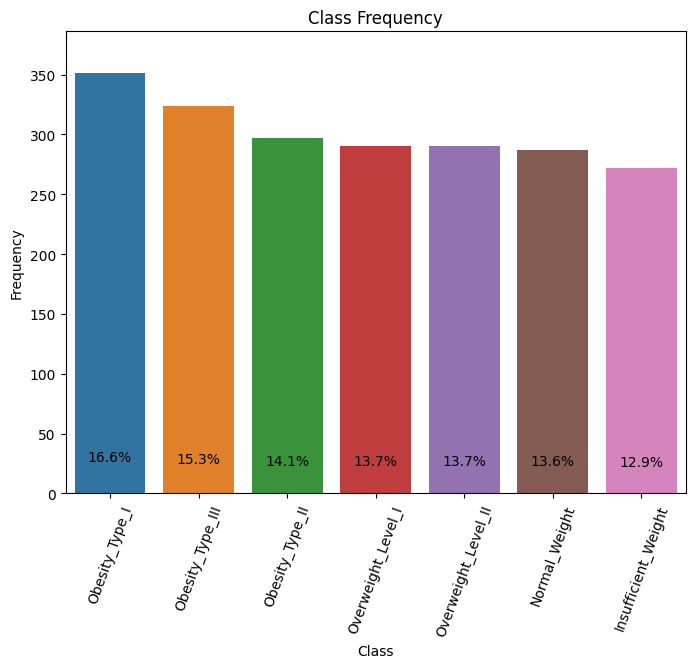

In [64]:
# Calculate class frequencies
class_freq = data['NObeyesdad'].value_counts()
class_percentage = class_freq / len(data) * 100

# Plot the class frequency with percentage using seaborn barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_freq.index, y=class_freq.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequency')
plt.ylim(top=max(class_freq.values) * 1.1)

# Rotate x-axis tick labels by 70 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

# Add percentage labels on the bars
for i, v in enumerate(class_percentage.values):
    plt.text(i, v + 10, f'{v:.1f}%', ha='center')


Visualizing Imbalance: The class distribution plot allows us to visually assess the balance or imbalance between different classes in a dataset. It provides a clear picture of whether one or more classes are underrepresented or overrepresented compared to others. Imbalanced class distributions can affect the performance of machine learning models and may require special handling or techniques

Based on the values shown in the bars, we can see that the percentage of samples for each class is relatively similar, with no class having a significantly higher or lower representation compared to the others. Therefore, we can consider the class distribution to be reasonably balanced.

### Feature Distribution

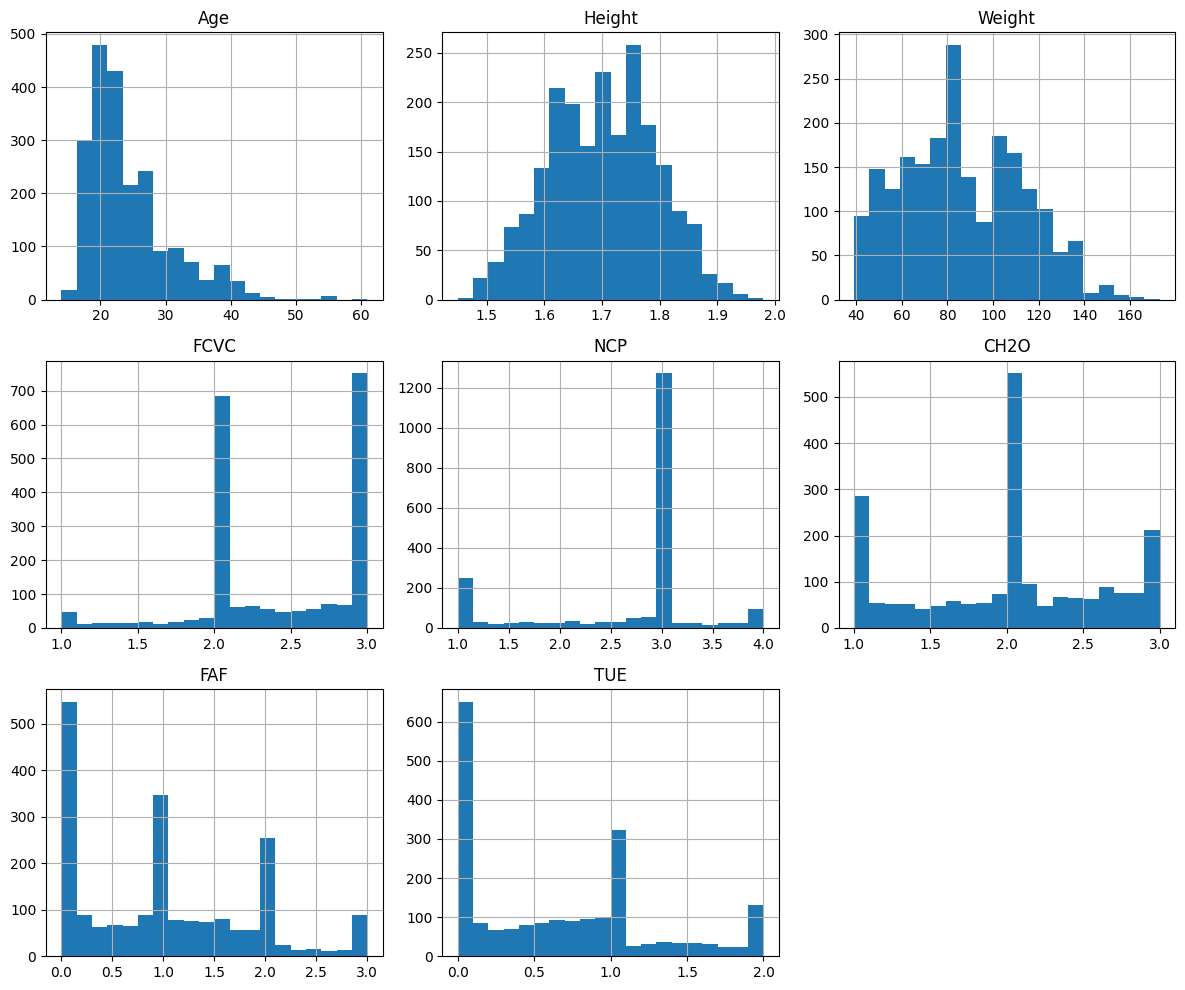

In [65]:
# Plot histograms for each feature
data.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

The histogram plot helps to visualise the data distribution

The Age feature is rightly screwed. The height feature is more or less normally distributed. The weight feature is more or less normally distributed. The other features looks scanting due low values

### Feature Relationship

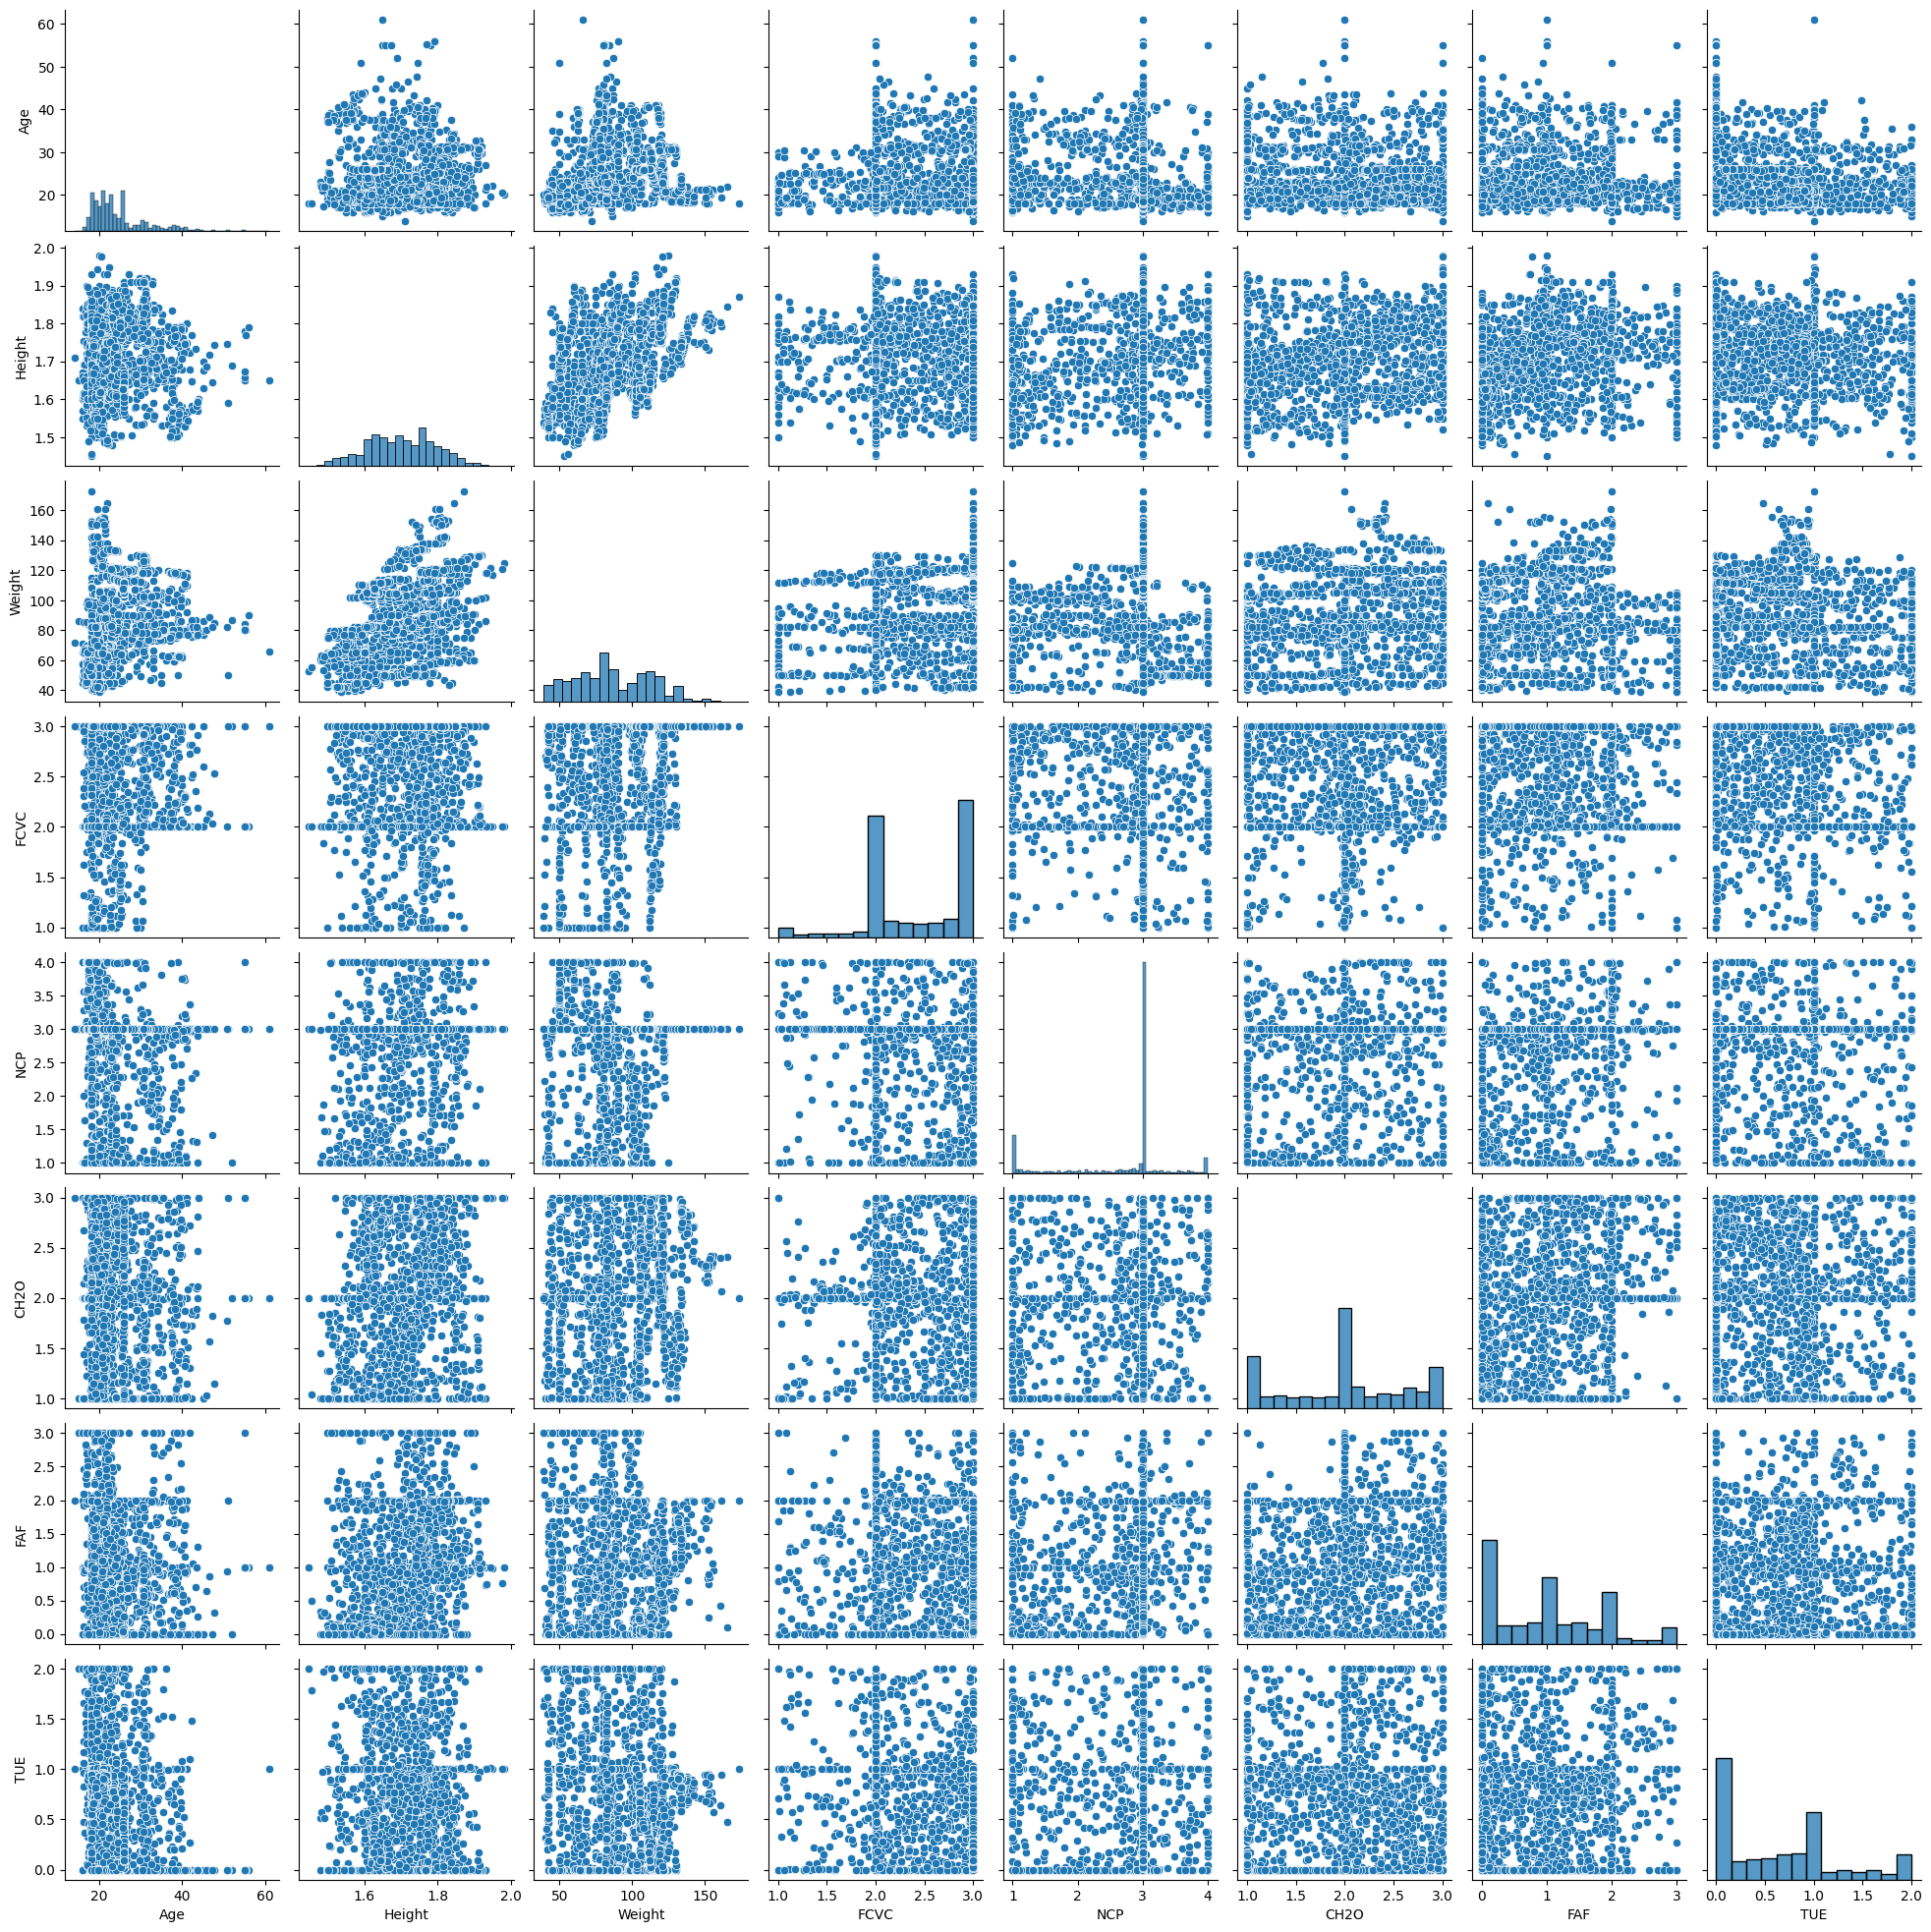

In [66]:
# Create a pair plot to visualize the relationships between features
sns.pairplot(data)
plt.show()

The following are the reasons for the  Seaborn pairplot:

Visualize multivariate relationships in a single plot.
Quickly gain insights into the structure and characteristics of the dataset.
Efficiently explore relationships between features without examining them individually.
Assess pairwise correlations between variables.
Communicate and present insights effectively to others.
Complement traditional statistical analysis techniques.
Enhance data analysis process and understanding of the data.

In summary, using pairplot helps in visually exploring and understanding the relationships between variables, making it a valuable tool for data analysis tasks.

### Visualise outliers 

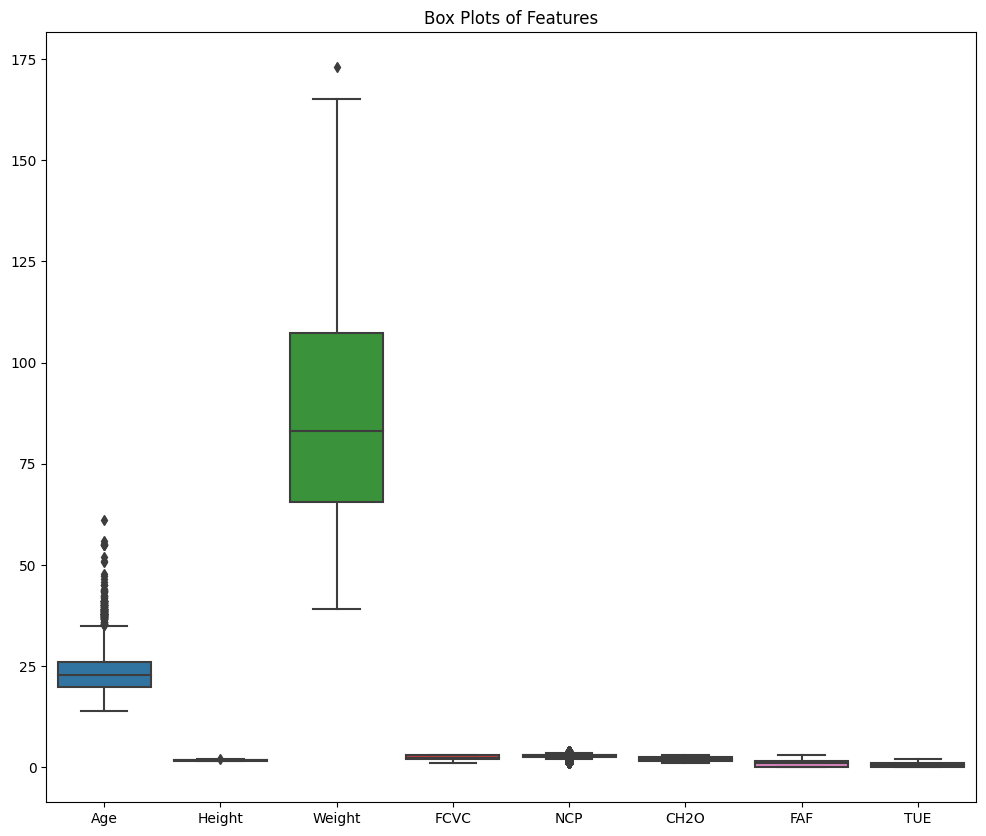

In [13]:
# set the plot size
plt.figure(figsize=(12, 10))
# plot the boxplot
sns.boxplot(data=data)
# Set the xticka axis to 0 degree
plt.xticks(rotation=0)
# title the plot
plt.title('Box Plots of Features')
# display the plot
plt.show()

By examining the boxplots, we can gain a visual understanding of the distribution, spread, and presence of outliers in each variable, which can aid in further analysis and interpretation of the dataset.

### Visualising noise in the data

<AxesSubplot:>

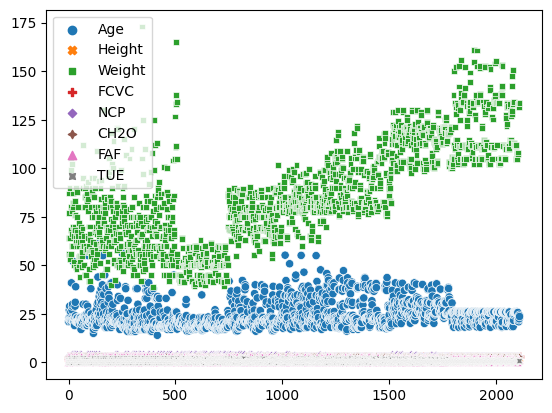

In [72]:
# plot the scatter plot
sns.scatterplot(data)

There are some noise in the weight feature but not much

### Visualising the target Class 

<AxesSubplot:ylabel='NObeyesdad'>

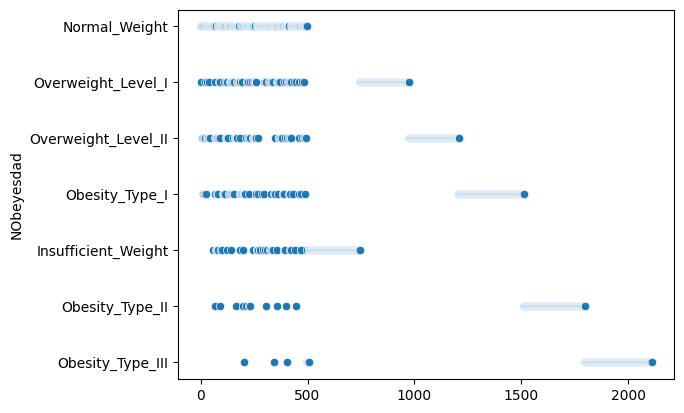

In [74]:
# plot the scatterplot with seaborn
sns.scatterplot(data.NObeyesdad)

some values seems to be far apart from each other

### Visualise the target class with respect to height and weight

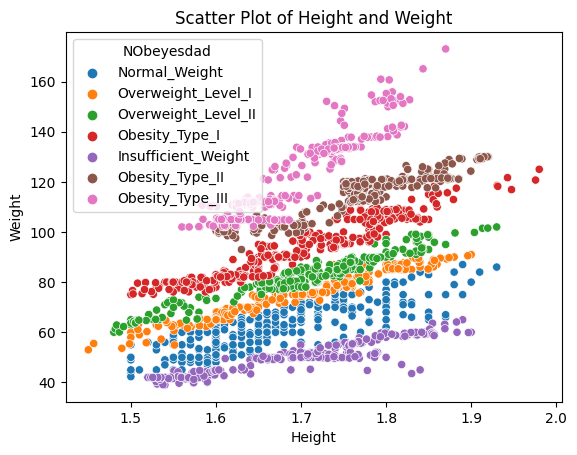

In [75]:
# Create a scatterplot using Seaborn
sns.scatterplot(data=data, x='Height', y='Weight', hue='NObeyesdad')

# Set the title and axis labels
plt.title('Scatter Plot of Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

# Show the plot
plt.show()

There seems to be relationship between the class and the height and weight features

### Visualise feature frequencies for the numeric columns

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


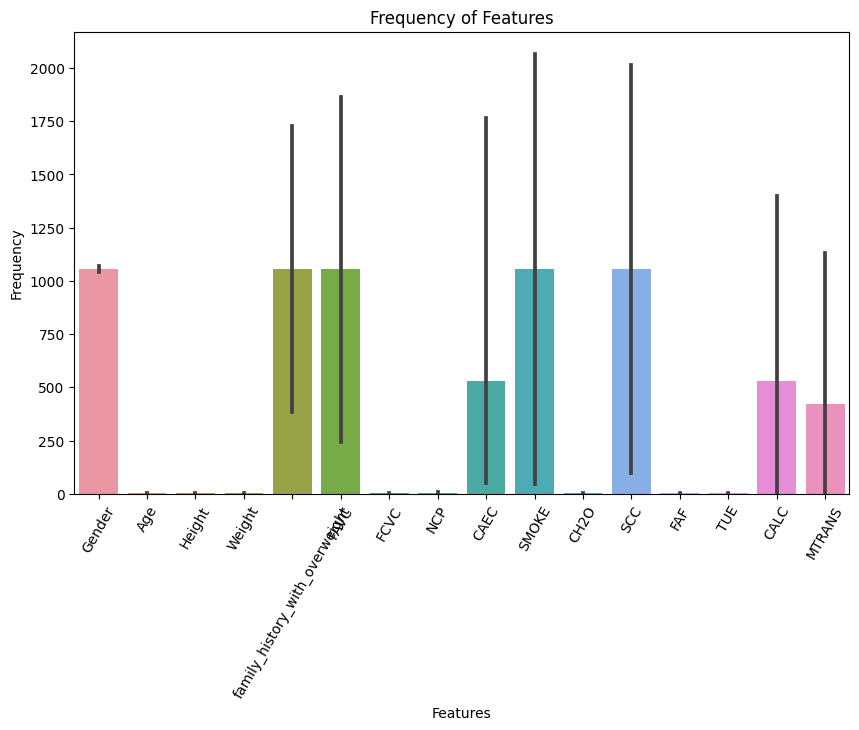

In [76]:
# Get the frequency counts for each feature
feature_counts = data.iloc[:, :-1].apply(pd.Series.value_counts)

# Reset the index and reshape the data for plotting
feature_counts = feature_counts.reset_index().melt(id_vars='index', var_name='Feature', value_name='Frequency')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=feature_counts, x='Feature', y='Frequency')

# Set the title and axis labels
plt.title('Frequency of Features')
plt.xlabel('Features')
plt.ylabel('Frequency')

# Rotate x-axis labels if needed
plt.xticks(rotation=60)

# Show the plot
plt.show()

## Barplot Analysis

In a bar plot created using Seaborn's sns.barplot, confidence intervals are typically represented as error bars on top of each bar. These error bars provide a visual indication of the uncertainty or variability associated with the estimated mean values

Note the length of the error bars in the above plot. <br>Longer error bars suggest a wider confidence interval and higher uncertainty, while shorter error bars indicate a narrower confidence interval and lower uncertainty.

## Visualising the gender distribution

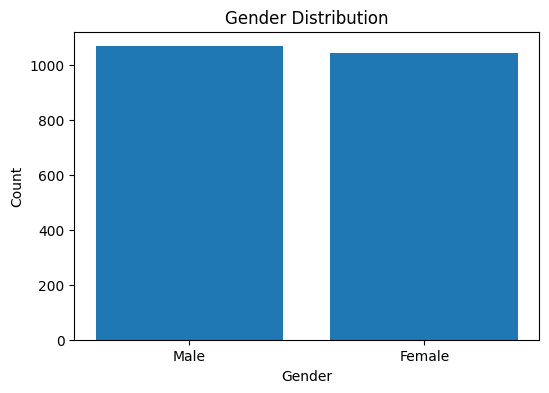

In [78]:
# Bar plot for gender distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


The gender distribution is almost thesame.
We used barplot to check the frequency level between male and female gender

## Correlation  Matrics Visualisation

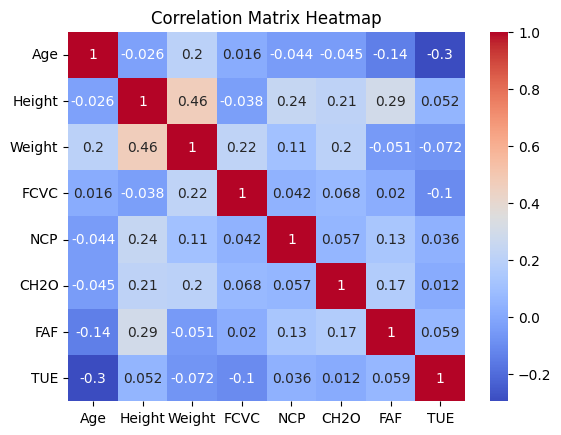

In [11]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Correlation Matrix for numeric features

In [10]:

# Create a DataFrame from the correlation matrix
df = pd.DataFrame(corr_matrix, columns=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], index=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

# Display the DataFrame
display(df)

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

## Interpreting the correlation matrix:

The diagonal elements of the matrix have a correlation coefficient of 1. This is expected since each variable is perfectly correlated with itself.

The off-diagonal elements represent the correlations between different pairs of variables.

For example, the correlation coefficient between Age and Height is -0.025958. This suggests a very weak negative correlation, indicating that there is almost no linear relationship between a person's age and their height.

The correlation coefficient between Height and Weight is 0.463136, indicating a moderate positive correlation. This suggests that there is a moderate linear relationship between a person's height and weight, meaning that taller individuals tend to have higher weights on average.

Similarly, the correlation coefficient between Age and Weight is 0.202560, indicating a weak positive correlation. This suggests that there is a slight relationship between a person's age and their weight.

The correlation coefficients range from -1 to 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A correlation coefficient close to 0 suggests little to no linear relationship between the variables.

It's important to note that correlation does not imply causation. While the correlation coefficients give insights into the relationships between variables, they do not indicate a causal relationship. Other factors and considerations should be taken into account when drawing conclusions from these correlation coefficients.

Overall, the correlation matrix plot helps to visualise and understand the degree and direction of the linear relationships between the variables, providing insights into how they may be related to each other.

There are no much correlation between the features. But TUE seems to be correlated with weight

# Data Preprocessing

In [80]:
# Rename the class column
data.rename(columns={'NObeyesdad': 'obesity_level'}, inplace=True)


# Set the target class
target = data['obesity_level']

# Define the features class
data = data.drop('obesity_level',axis=1)

### Class Transformation

In [81]:
# Perform one-hot encoding on the target
target_encoded = pd.get_dummies(target)

# Display the resulting DataFrame
target_encoded

Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
0                       0              1               0                0   
1                       0              1               0                0   
2                       0              1               0                0   
3                       0              0               0                0   
4                       0              0               0                0   
...                   ...            ...             ...              ...   
2106                    0              0               0                0   
2107                    0              0               0                0   
2108                    0              0               0                0   
2109                    0              0               0                0   
2110                    0              0               0                0   

      Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
0                    0                   0                    0  
1                    0                   0                    0  
2                    0                   0                    0  
3                    0                   1                    0  
4                    0                   0                    1  
...                ...                 ...                  ...  
2106                 1                   0                    0  
2107                 1                   0                    0  
2108                 1                   0                    0  
2109                 1                   0                    0  
2110                 1                   0                    0  

[2111 rows x 7 columns]

## Define the Transformation Techniques

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'data' is the DataFrame containing the dataset

# Define the transformations for different column types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Define the columns to be transformed
numeric_columns = ['Age', 'Height', 'Weight','FCVC','NCP','CH2O','FAF','TUE']
categorical_columns = ['Gender', 'family_history_with_overweight', 'SMOKE', 'SCC','FAVC','MTRANS', 'CALC', 'CAEC']


# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ])



## Split the dataset into training and testing set

In [87]:
# Split the data into training and testing sets
X_train_, X_test_, y_train, y_test = train_test_split(data, target_encoded, test_size=0.2, random_state=42)
print(f'X_train shape:{X_train_.shape}, dimension: {X_train_.ndim}')
print(f'X_test shape:{X_test_.shape}, dimension: {X_test_.ndim}')
print(f'y_train shape:{y_train.shape}, dimension: {y_train.ndim}')
print(f'y_test shape:{y_test.shape}, dimension: {y_test.ndim}')

X_train shape:(1688, 16), dimension: 2
X_test shape:(423, 16), dimension: 2
y_train shape:(1688, 7), dimension: 2
y_test shape:(423, 7), dimension: 2


### Features Transformation

In [88]:
# Apply the preprocessing to the data
X_train = preprocessor.fit_transform(X_train_)
X_test = preprocessor.transform(X_test_)

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(X_train)

# Get the column names after transformation
transformed_columns = numeric_columns + list(preprocessor.named_transformers_['categorical'].get_feature_names_out(categorical_columns))

# Set the column names of the transformed DataFrame
transformed_df.columns = transformed_columns

# Print the transformed DataFrame
display(transformed_df)

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.532646 -0.768029 -1.019413  1.076717  0.401513 -0.010142  1.186213   
1    -0.544235  0.546078  1.802127  1.076717  0.401513  1.446428  0.567871   
2    -0.239258 -0.427896 -0.153398 -2.268694 -1.700740  1.246128 -1.043353   
3    -0.403229 -1.217973 -1.623588  1.076717 -1.265210  0.892863  0.112755   
4     0.238722  1.179597  0.745216  1.076717  0.401513  1.398040  0.963833   
...        ...       ...       ...       ...       ...       ...       ...   
1683  1.210959  0.572086  1.283958  1.015815  0.401513  0.859598 -0.058240   
1684 -0.223774  0.186265 -0.188882 -0.785729 -1.222424 -0.994283 -0.138521   
1685 -0.225342 -0.553536 -0.252885 -0.785729  0.401513 -0.010142 -1.021224   
1686 -0.223774 -0.787677 -0.080494 -0.676427  0.352945  0.007245 -0.182435   
1687 -0.687082  1.242636 -0.061253  0.985792  0.401513  1.630769  1.703107   

           TUE  Gender_Female  Gender_Male  family_history_with_overweight_no  \
0    -1.069472            1.0          0.0                                0.0   
1     0.224537            1.0          0.0                                0.0   
2     1.684843            1.0          0.0                                0.0   
3    -1.069472            1.0          0.0                                1.0   
4     0.059515            0.0          1.0                                0.0   
...        ...            ...          ...                                ...   
1683  1.153318            0.0          1.0                                0.0   
1684  0.610167            0.0          1.0                                0.0   
1685  2.250028            1.0          0.0                                0.0   
1686 -0.022392            1.0          0.0                                0.0   
1687 -0.137353            0.0          1.0                                0.0   

      family_history_with_overweight_yes  SMOKE_no  SMOKE_yes  SCC_no  \
0                                    1.0       0.0        1.0     1.0   
1                                    1.0       1.0        0.0     1.0   
2                                    1.0       1.0        0.0     1.0   
3                                    0.0       1.0        0.0     1.0   
4                                    1.0       1.0        0.0     1.0   
...                                  ...       ...        ...     ...   
1683                                 1.0       1.0        0.0     1.0   
1684                                 1.0       1.0        0.0     1.0   
1685                                 1.0       1.0        0.0     1.0   
1686                                 1.0       1.0        0.0     1.0   
1687                                 1.0       1.0        0.0     1.0   

      SCC_yes  FAVC_no  FAVC_yes  MTRANS_Automobile  MTRANS_Bike  \
0         0.0      0.0       1.0                0.0          0.0   
1         0.0      0.0       1.0                0.0          0.0   
2         0.0      0.0       1.0                0.0          0.0   
3         0.0      1.0       0.0                0.0          0.0   
4         0.0      0.0       1.0                0.0          0.0   
...       ...      ...       ...                ...          ...   
1683      0.0      0.0       1.0                1.0          0.0   
1684      0.0      0.0       1.0                0.0          0.0   
1685      0.0      0.0       1.0                0.0          0.0   
1686      0.0      0.0       1.0                0.0          0.0   
1687      0.0      0.0       1.0                0.0          0.0   

      MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  \
0                  0.0                           1.0             0.0   
1                  0.0                           1.0             0.0   
2                  0.0                           1.0             0.0   
3                  0.0                           1.0             0.0   
4                  0.0                         

In [89]:
# View features and class shapes
print('Features shape',X_train.shape,'Dimension:',X_train.ndim)
print('Class shape',y_train.shape,'Dimension:',y_train.ndim)

Features shape (1688, 31) Dimension: 2
Class shape (1688, 7) Dimension: 2


Our data is now ready for training

# Pytorch Models

### Pytorch Model 1

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)

# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(X_train.shape[1], 6)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(6, 100)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(100, 7)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = Model()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.argmax(axis=1), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.argmax(axis=1), dtype=torch.long)


# Define the number of epochs
epochs = 250

# Initialize lists to store loss and accuracy values
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Compute the training accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / len(y_train)

    # Compute the validation loss and accuracy
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == y_test_tensor).sum().item()
        val_accuracy = val_correct / len(y_test)

    # Print the training and validation metrics
    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Loss: {loss.item():.4f}, "
          f"Accuracy: {accuracy:.4f}, "
          f"Val Loss: {val_loss.item():.4f}, "
          f"Val Accuracy: {val_accuracy:.4f}")

    # Store loss and accuracy values
    train_loss_history.append(loss.item())
    train_accuracy_history.append(accuracy)
    val_loss_history.append(val_loss.item())
    val_accuracy_history.append(val_accuracy)
    
# Evaluate the model on test data
test_outputs_ = model(X_test_tensor)
test_loss_ = criterion(test_outputs_, y_test_tensor)
_, test_predicted_ = torch.max(test_outputs_, 1)

Epoch [1/250], Loss: 1.9461, Accuracy: 0.1114, Val Loss: 1.9421, Val Accuracy: 0.1844
Epoch [2/250], Loss: 1.9430, Accuracy: 0.1617, Val Loss: 1.9379, Val Accuracy: 0.1844
Epoch [3/250], Loss: 1.9392, Accuracy: 0.1617, Val Loss: 1.9323, Val Accuracy: 0.2719
Epoch [4/250], Loss: 1.9342, Accuracy: 0.2530, Val Loss: 1.9249, Val Accuracy: 0.3097
Epoch [5/250], Loss: 1.9272, Accuracy: 0.2962, Val Loss: 1.9153, Val Accuracy: 0.2908
Epoch [6/250], Loss: 1.9180, Accuracy: 0.2761, Val Loss: 1.9033, Val Accuracy: 0.2553
Epoch [7/250], Loss: 1.9063, Accuracy: 0.2500, Val Loss: 1.8888, Val Accuracy: 0.2530
Epoch [8/250], Loss: 1.8920, Accuracy: 0.2494, Val Loss: 1.8721, Val Accuracy: 0.2742
Epoch [9/250], Loss: 1.8755, Accuracy: 0.2672, Val Loss: 1.8534, Val Accuracy: 0.3050
Epoch [10/250], Loss: 1.8571, Accuracy: 0.2921, Val Loss: 1.8328, Val Accuracy: 0.3617
Epoch [11/250], Loss: 1.8368, Accuracy: 0.3318, Val Loss: 1.8105, Val Accuracy: 0.3806
Epoch [12/250], Loss: 1.8148, Accuracy: 0.3714, Val 

Epoch [97/250], Loss: 1.2376, Accuracy: 0.9437, Val Loss: 1.2654, Val Accuracy: 0.9125
Epoch [98/250], Loss: 1.2357, Accuracy: 0.9455, Val Loss: 1.2631, Val Accuracy: 0.9149
Epoch [99/250], Loss: 1.2337, Accuracy: 0.9473, Val Loss: 1.2612, Val Accuracy: 0.9173
Epoch [100/250], Loss: 1.2316, Accuracy: 0.9508, Val Loss: 1.2593, Val Accuracy: 0.9173
Epoch [101/250], Loss: 1.2296, Accuracy: 0.9532, Val Loss: 1.2573, Val Accuracy: 0.9173
Epoch [102/250], Loss: 1.2277, Accuracy: 0.9532, Val Loss: 1.2553, Val Accuracy: 0.9196
Epoch [103/250], Loss: 1.2260, Accuracy: 0.9573, Val Loss: 1.2529, Val Accuracy: 0.9196
Epoch [104/250], Loss: 1.2243, Accuracy: 0.9585, Val Loss: 1.2508, Val Accuracy: 0.9220
Epoch [105/250], Loss: 1.2228, Accuracy: 0.9591, Val Loss: 1.2490, Val Accuracy: 0.9243
Epoch [106/250], Loss: 1.2214, Accuracy: 0.9597, Val Loss: 1.2470, Val Accuracy: 0.9243
Epoch [107/250], Loss: 1.2201, Accuracy: 0.9591, Val Loss: 1.2451, Val Accuracy: 0.9243
Epoch [108/250], Loss: 1.2189, Accu

Epoch [201/250], Loss: 1.1795, Accuracy: 0.9923, Val Loss: 1.1969, Val Accuracy: 0.9787
Epoch [202/250], Loss: 1.1795, Accuracy: 0.9923, Val Loss: 1.1951, Val Accuracy: 0.9764
Epoch [203/250], Loss: 1.1791, Accuracy: 0.9923, Val Loss: 1.1953, Val Accuracy: 0.9764
Epoch [204/250], Loss: 1.1789, Accuracy: 0.9923, Val Loss: 1.1961, Val Accuracy: 0.9764
Epoch [205/250], Loss: 1.1789, Accuracy: 0.9923, Val Loss: 1.1951, Val Accuracy: 0.9740
Epoch [206/250], Loss: 1.1789, Accuracy: 0.9923, Val Loss: 1.1962, Val Accuracy: 0.9764
Epoch [207/250], Loss: 1.1787, Accuracy: 0.9923, Val Loss: 1.1955, Val Accuracy: 0.9764
Epoch [208/250], Loss: 1.1785, Accuracy: 0.9923, Val Loss: 1.1954, Val Accuracy: 0.9764
Epoch [209/250], Loss: 1.1785, Accuracy: 0.9923, Val Loss: 1.1963, Val Accuracy: 0.9764
Epoch [210/250], Loss: 1.1785, Accuracy: 0.9929, Val Loss: 1.1952, Val Accuracy: 0.9764
Epoch [211/250], Loss: 1.1784, Accuracy: 0.9923, Val Loss: 1.1961, Val Accuracy: 0.9764
Epoch [212/250], Loss: 1.1782, A

### Final Model Metrics After Training

In [91]:
# Compute the final training accuracy
final_train_outputs = model(X_train_tensor)
final_train_loss = criterion(final_train_outputs, y_train_tensor)
_, final_train_predicted = torch.max(final_train_outputs, 1)
final_train_accuracy = (final_train_predicted == y_train_tensor).sum().item() / len(y_train)

# Compute the final validation accuracy
final_val_outputs = model(X_test_tensor)
final_val_loss = criterion(final_val_outputs, y_test_tensor)
_, final_val_predicted = torch.max(final_val_outputs, 1)
final_val_accuracy = (final_val_predicted == y_test_tensor).sum().item() / len(y_test)

# Print the final model metrics
print("Final Model Metrics:")
print(f"Training Loss: {final_train_loss.item():.4f}")
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Validation Loss: {final_val_loss.item():.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")

Final Model Metrics:
Training Loss: 1.1757
Training Accuracy: 0.9935
Validation Loss: 1.1957
Validation Accuracy: 0.9764


### Pytorch Model 1 Evaluation on Test Data

In [93]:
# Evaluate the model on test data
test_outputs = model(X_test_tensor)
test_loss = criterion(test_outputs, y_test_tensor)
_, test_predicted = torch.max(test_outputs, 1)
test_accuracy = (test_predicted == y_test_tensor).sum().item() / len(y_test)

# Print the model accuracy and loss on test data
print(f"Test Loss: {test_loss.item():.4f}")
print(f"Model Accuracy on Test Data: {test_accuracy:.4f}")

Test Loss: 1.1957
Model Accuracy on Test Data: 0.9764


### Pytorch Model One Breakdown

This code snippet demonstrates the training and evaluation of a PyTorch model using the provided architecture.

Here's a breakdown of the code:

Model Architecture: The model consists of several fully connected (linear) layers with ReLU activation functions. It starts with the flatten layer that reshapes the input tensor into a 1-dimensional vector. Then, it passes through fc1 with an output size of 6, followed by a ReLU activation (relu1). The output is then passed through fc2 with an output size of 100, followed by another ReLU activation (relu2). Finally, it passes through fc3 with an output size of 7, representing the number of classes in the classification problem. The output is passed through a softmax activation function (softmax) to obtain the class probabilities.

Loss Function and Optimizer: The model uses the cross-entropy loss function (nn.CrossEntropyLoss()), which is commonly used for multi-class classification problems. The Adam optimizer (optim.Adam) is used for parameter optimization, with a learning rate of 0.01.

Training Loop: The model is trained using a loop that iterates over a specified number of epochs. In each epoch, the gradients are zeroed (optimizer.zero_grad()), and the forward pass is performed to obtain the outputs. The loss is computed based on the predicted outputs and the ground truth labels. Then, the backward pass is performed to compute the gradients and update the model's parameters (loss.backward() and optimizer.step()). The training accuracy is calculated by comparing the predicted labels with the ground truth labels. The validation loss and accuracy are also calculated using the same process but with the validation dataset.

Performance Evaluation: During training, the loss, accuracy, validation loss, and validation accuracy are printed for each epoch. Additionally, the values are stored in separate lists (train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history) to track the training progress. After training, the model is evaluated on the test dataset, and the test loss and test predicted labels are computed.


### Visualise Training  and Validation loss and accuracy 

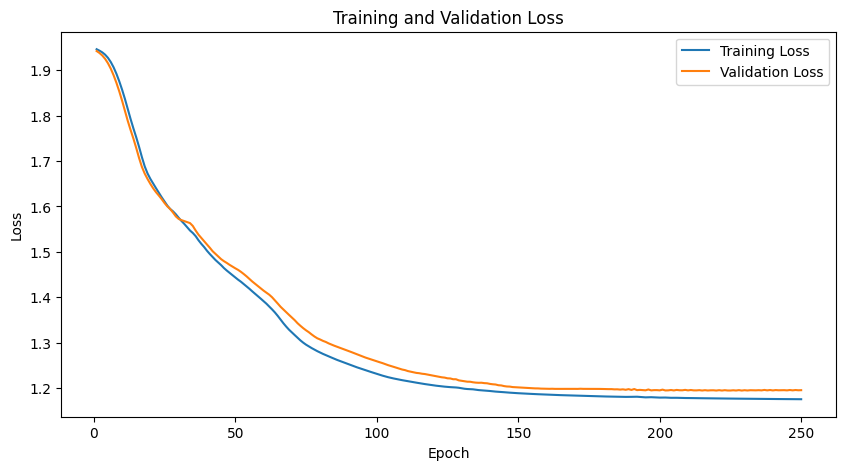

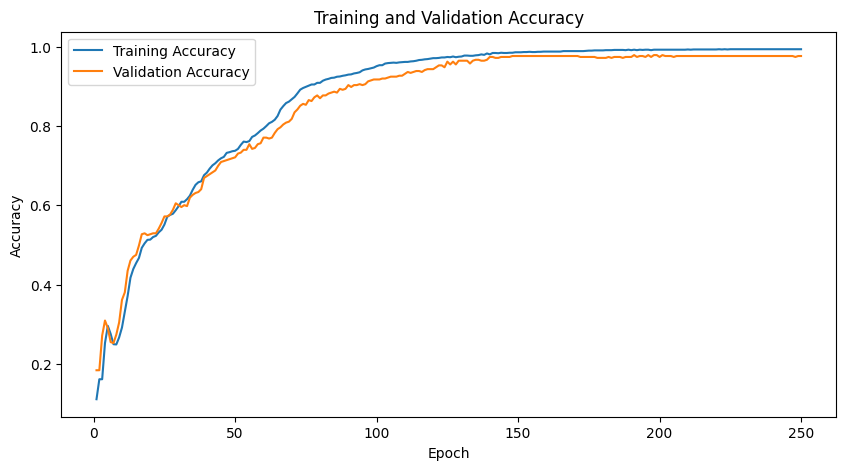

In [94]:
# Plot the training and validation metrics
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_loss_history, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Plot Analysis

The model plot shows the training loss, training accuracy, validation loss, and validation accuracy during the training process.

Training Loss: The plot starts with a relatively high training loss and gradually decreases over time. At the end of training, the training loss reaches a value of 1.1757. This indicates that the model has learned to minimize the discrepancy between its predicted probabilities and the true labels on the training data. The decreasing trend suggests that the model is effectively adjusting its parameters to fit the training data better.

Training Accuracy: The plot shows an increasing trend for the training accuracy. Initially, the model has a lower accuracy, but as the training progresses, it improves its performance. The final training accuracy is 0.9935, which means that the model correctly predicts the class labels for 99.35% of the training examples.

Validation Loss: Similar to the training loss, the validation loss also starts relatively high and gradually decreases over time. The validation loss at the end of training is 1.1957. This indicates that the model's performance on unseen validation data improves as it learns from the training data. The decreasing trend suggests that the model is not overfitting and can generalize well to new examples.

Validation Accuracy: The plot shows an increasing trend for the validation accuracy. Initially, the validation accuracy is lower, but it improves over time. The final validation accuracy is 0.9764, which means that the model correctly predicts the class labels for 97.64% of the validation examples. This indicates that the model has good generalization performance and can classify unseen examples accurately.

Overall, the model plot demonstrates that the model effectively learns from the training data and generalizes well to unseen validation data. The decreasing loss values and increasing accuracy values indicate that the model's performance improves over time. The final metrics, including the training loss, training accuracy, validation loss, and validation accuracy, further confirm the model's ability to learn from the data and make accurate predictions.

###  Confidence score, and class label for the model's predictions

In [101]:
# Compute the probability, confidence score, and class label for the model's predictions
test_probabilities = torch.softmax(test_outputs_, dim=1)
test_confidence_scores, test_class_labels = torch.max(test_probabilities, 1)

# Print the result
for i in range(len(test_class_labels)):
    print(f"Confidence Score={test_confidence_scores[i]:.4f}, "
          f"Class Label={test_class_labels[i]}")

Confidence Score=0.3118, Class Label=0
Confidence Score=0.3118, Class Label=4
Confidence Score=0.3116, Class Label=0
Confidence Score=0.3118, Class Label=0
Confidence Score=0.2292, Class Label=1
Confidence Score=0.3118, Class Label=0
Confidence Score=0.3118, Class Label=3
Confidence Score=0.3118, Class Label=5
Confidence Score=0.3118, Class Label=2
Confidence Score=0.3118, Class Label=0
Confidence Score=0.3118, Class Label=2
Confidence Score=0.3118, Class Label=4
Confidence Score=0.3089, Class Label=3
Confidence Score=0.3118, Class Label=3
Confidence Score=0.3118, Class Label=4
Confidence Score=0.3104, Class Label=6
Confidence Score=0.3118, Class Label=4
Confidence Score=0.3118, Class Label=3
Confidence Score=0.3118, Class Label=2
Confidence Score=0.3118, Class Label=6
Confidence Score=0.3118, Class Label=2
Confidence Score=0.2998, Class Label=5
Confidence Score=0.3118, Class Label=4
Confidence Score=0.3117, Class Label=2
Confidence Score=0.3067, Class Label=1
Confidence Score=0.3117, 

<h3> Code Snippet Analysis </h3> <br>
In this code, the softmax function is applied to the model's output (test_outputs_) using torch.softmax(test_outputs_, dim=1). This gives the probabilities for each class. The torch.max() function is then used to find the class label with the highest confidence score (test_confidence_scores, test_class_labels = torch.max(test_probabilities, 1)).

Finally, a loop is used to iterate through each instance in the test data, and the computed, confidence score, and class label are printed for each instance. Adjust the loop's range according to the number of instances in your test data.

### View the maximum values, decsion boundary, decision, probabilities and  predicted class labels in pandas dataframe

In [102]:
class_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
                'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
                'Overweight_Level_II']

# Perform torch.max() to get the predicted index
_, test_predicted_indices = torch.max(test_outputs_, 1)

# Calculate the confidence scores using softmax
confidence_scores = torch.softmax(test_outputs_, dim=1)

# Calculate the probability using the confidence scores
probabilities = confidence_scores.max(dim=1).values

# Define the decision boundary
decision_boundary = 0.5

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Instance', 'Maximum Value', 'Predicted Class (Number)',
                                  'Predicted Class (Text)', 'Probability', 'Decision'])

# Populate the DataFrame with the results
for instance, max_val, predicted_index, predicted_label, confidence_score, probability in zip(X_test, test_outputs_.max(dim=1).values,
                                                                                    test_predicted_indices,
                                                                                    test_predicted_,
                                                                                    confidence_scores,
                                                                                    probabilities):
    label_num = predicted_label.item()
    label_text = class_labels[label_num]
    decision = 'Above Boundary' if confidence_score[label_num] > decision_boundary else 'Below Boundary'
    result_df = result_df.append({'Instance': instance,
                                  'Maximum Value': max_val.item(),
                                  'Predicted Class (Number)': label_num,
                                  'Predicted Class (Text)': label_text,
                                  'Probability': probability.item(),
                                  'Decision': decision}, ignore_index=True)

# Add the decision boundary value to the DataFrame
result_df['Decision Boundary (threshold)'] = decision_boundary

# Display the DataFrame
display(result_df)

Instance  Maximum Value  \
0    [-0.6242463187609538, 0.5830462588692961, -1.2...       0.999988   
1    [0.23953320269031617, -0.8221891247963808, 0.9...       0.999986   
2    [-0.9959534402264052, 1.5914035660327588, -1.0...       0.999268   
3    [-0.5326459491326346, -1.9477459028568904, -1....       0.999953   
4    [-0.3782101187680445, 0.5189340300055916, -0.4...       0.647080   
..                                                 ...            ...   
418  [-0.841517609861815, 1.0551687980191753, 0.015...       0.681168   
419  [0.9677228525922172, -0.5515085385984843, 0.55...       0.999974   
420  [-0.841517609861815, 1.5914035660327588, -0.82...       0.990677   
421  [0.7007151934507787, 0.611359454620413, 1.0311...       0.999982   
422  [-0.8593008957282975, -0.020872061562961505, -...       0.999920   

    Predicted Class (Number) Predicted Class (Text)  Probability  \
0                          0    Insufficient_Weight     0.311788   
1                          4       Obesity_Type_III     0.311788   
2                          0    Insufficient_Weight     0.311608   
3                          0    Insufficient_Weight     0.311779   
4                          1          Normal_Weight     0.229199   
..                       ...                    ...          ...   
418                        5     Overweight_Level_I     0.236621   
419                        3        Obesity_Type_II     0.311784   
420                        0    Insufficient_Weight     0.309461   
421                        3        Obesity_Type_II     0.311787   
422                        6    Overweight_Level_II     0.311771   

           Decision  Decision Boundary (threshold)  
0    Below Boundary                            0.5  
1    Below Boundary                            0.5  
2    Below Boundary                            0.5  
3    Below Boundary                            0.5  
4    Below Boundary                            0.5  
..              ...                            ...  
418  Below Boundary                            0.5  
419  Below Boundary                            0.5  
420  Below Boundary                            0.5  
421  Below Boundary                            0.5  
422  Below Boundary                            0.5  

[423 rows x 7 columns]

### Model Performance Evaluation

In [103]:
# Display Model performance
print(f'Training Accuracy: {accuracy}.  Training Loss: {loss}')
print(f'Validation Accuracy: {val_accuracy}. Validation Loss: {val_loss}')

Training Accuracy: 0.9934834123222749.  Training Loss: 1.1757811307907104
Validation Accuracy: 0.9763593380614657. Validation Loss: 1.1957077980041504


!Wow 97 percent accuracy achieved

## Predicted Classes and their Decision Confident Interval

In [104]:
#Forward pass on the test data
test_outputs = model(X_test_tensor)

# Get the predicted class indices
_, predicted_indices = torch.max(test_outputs, 1)

# Get the probabilities for the predicted classes
predicted_probabilities = torch.softmax(test_outputs, dim=1)

# Print the predicted classes and decision confidence intervals
for i in range(len(predicted_indices)):
    predicted_class = predicted_indices[i].item()
    confidence_interval = predicted_probabilities[i][predicted_class].item()
    print(f"Instance {i + 1}: Predicted Class: {predicted_class}, Confidence: {confidence_interval}")

Instance 1: Predicted Class: 0, Confidence: 0.31178808212280273
Instance 2: Predicted Class: 4, Confidence: 0.31178751587867737
Instance 3: Predicted Class: 0, Confidence: 0.31160762906074524
Instance 4: Predicted Class: 0, Confidence: 0.31177932024002075
Instance 5: Predicted Class: 1, Confidence: 0.22919903695583344
Instance 6: Predicted Class: 0, Confidence: 0.31179067492485046
Instance 7: Predicted Class: 3, Confidence: 0.31179070472717285
Instance 8: Predicted Class: 5, Confidence: 0.31179100275039673
Instance 9: Predicted Class: 2, Confidence: 0.31179022789001465
Instance 10: Predicted Class: 0, Confidence: 0.3117910325527191
Instance 11: Predicted Class: 2, Confidence: 0.3117589056491852
Instance 12: Predicted Class: 4, Confidence: 0.3117900490760803
Instance 13: Predicted Class: 3, Confidence: 0.3088676333427429
Instance 14: Predicted Class: 3, Confidence: 0.31179091334342957
Instance 15: Predicted Class: 4, Confidence: 0.311787486076355
Instance 16: Predicted Class: 6, Confide

### Confusion Matrix for the Predicted Class

In [113]:
from sklearn.metrics import confusion_matrix

# Convert the predicted labels and true labels to numpy arrays
test_predicted_np = test_predicted_.detach().numpy()
y_test_np = y_test_tensor.numpy()

# Compute the confusion matrix
cm1 = confusion_matrix(y_test_np, test_predicted_np)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm1)

Confusion Matrix:
[[56  0  0  0  0  0  0]
 [ 5 56  0  0  0  1  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 53  1]
 [ 0  0  0  0  0  1 49]]


### Predicted class proportion

In [114]:
# Compute the total number of instances for each true class
total_instances = cm1.sum(axis=1)

# Compute the confusion matrix in percentage
cm_percent = (cm1 / total_instances[:, None]) * 100

# Print the confusion matrix in percentage
print("Confusion Matrix (in percent):")
print(cm_percent)

Confusion Matrix (in percent):
[[100.           0.           0.           0.           0.
    0.           0.        ]
 [  8.06451613  90.32258065   0.           0.           0.
    1.61290323   0.        ]
 [  0.           0.         100.           0.           0.
    0.           0.        ]
 [  0.           0.           0.         100.           0.
    0.           0.        ]
 [  0.           0.           0.           0.         100.
    0.           0.        ]
 [  0.           3.57142857   0.           0.           0.
   94.64285714   1.78571429]
 [  0.           0.           0.           0.           0.
    2.          98.        ]]


### Confusion Matrix Visualisation

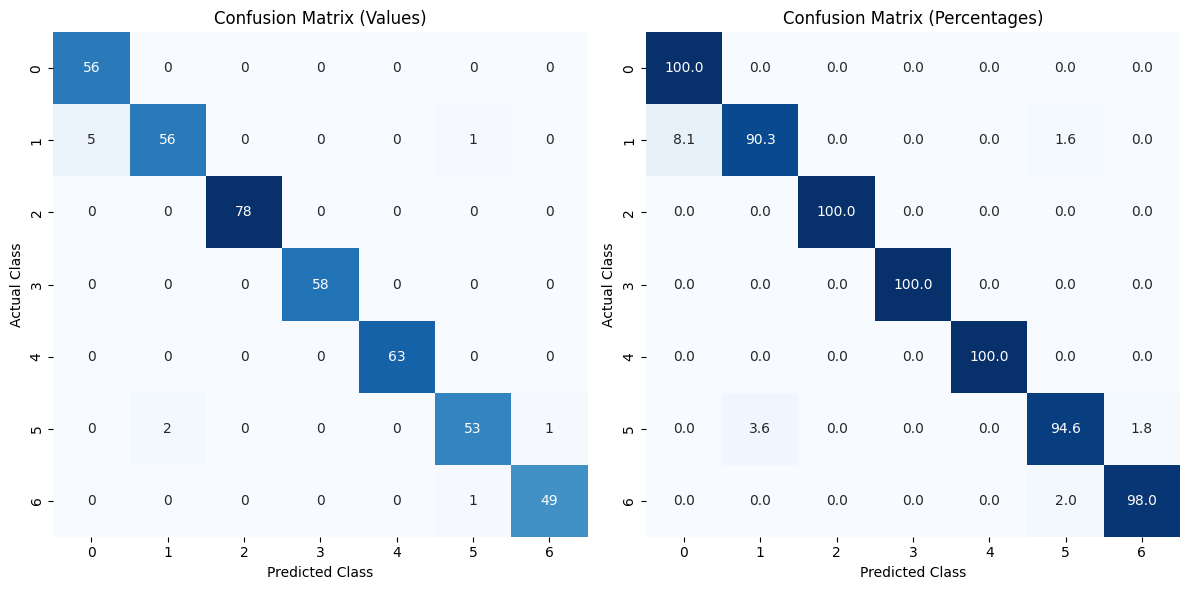

In [115]:

# Compute the confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), test_predicted_.numpy())

# Convert the confusion matrix to percentages
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix with values
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, ax=ax1)
ax1.set_xlabel("Predicted Class")
ax1.set_ylabel("Actual Class")
ax1.set_title("Confusion Matrix (Values)")

# Plot the confusion matrix with percentages
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues", cbar=False, ax=ax2)
ax2.set_xlabel("Predicted Class")
ax2.set_ylabel("Actual Class")
ax2.set_title("Confusion Matrix (Percentages)")

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()

# Display the plot
plt.show()

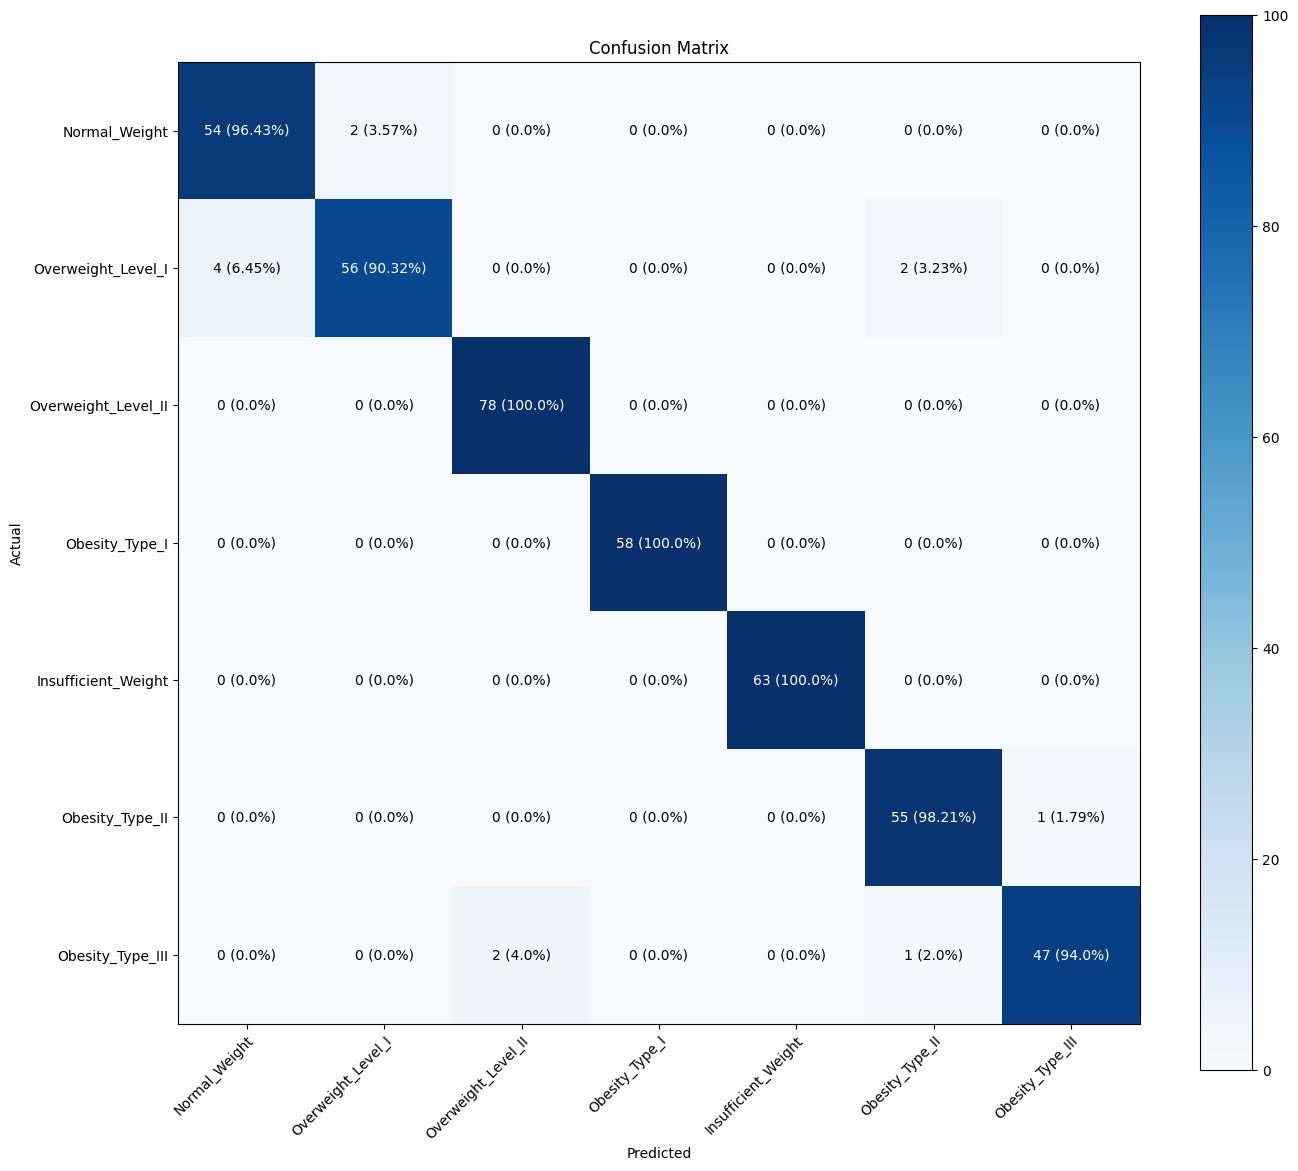

In [169]:
# Calculate the percentages
total_counts = np.sum(cm, axis=1)
percentage_matrix = np.round(cm / total_counts[:, np.newaxis] * 100, 2)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 12))
im = ax.imshow(percentage_matrix, cmap="Blues")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
classes = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, f"{cm[i, j]} ({percentage_matrix[i, j]}%)",
                       ha="center", va="center", color="black" if percentage_matrix[i, j] < 50 else "white")

# Set title and labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Display the plot
plt.tight_layout()
plt.show()

### Pytorch Model 1: Confusion Matrix Analysis

The above confusion matrix represents the performance of the model with respect to the true class labels. Each value in the matrix represents the percentage of instances belonging to a particular class that were predicted correctly or incorrectly. Let's interpret this confusion matrix with the corresponding class labels:

The first row corresponds to the instances with the true class "Normal_Weight". The model correctly predicted all instances (100%) as "Normal_Weight".

The second row represents the instances with the true class "Overweight_Level_I". The model correctly predicted 90.32% of instances as "Overweight_Level_I", and it incorrectly predicted 8.06% of instances as "Normal_Weight" and 1.61% of instances as "Obesity_Type_II".

The third row corresponds to the instances with the true class "Overweight_Level_II". The model correctly predicted all instances (100%) as "Overweight_Level_II".

The fourth row represents the instances with the true class "Obesity_Type_I". The model correctly predicted all instances (100%) as "Obesity_Type_I".

The fifth row corresponds to the instances with the true class "Insufficient_Weight". The model correctly predicted all instances (100%) as "Insufficient_Weight".

The sixth row represents the instances with the true class "Obesity_Type_II". The model correctly predicted 94.64% of instances as "Obesity_Type_II". It incorrectly predicted 3.57% of instances as "Overweight_Level_I" and 1.79% of instances as "Obesity_Type_III".

The seventh row corresponds to the instances with the true class "Obesity_Type_III". The model correctly predicted 98% of instances as "Obesity_Type_III". It incorrectly predicted 2% of instances as "Obesity_Type_II".

Overall, the confusion matrix provides an understanding of the model's performance for each class. It shows the percentage of correct predictions (True Positives) along the diagonal and the percentage of incorrect predictions (False Positives and False Negatives) off the diagonal. The values in the confusion matrix represent the percentages of instances for each class.

Here's how we can interpret the values in the confusion matrix:

The class labels are:
Normal_Weight
Overweight_Level_I
Overweight_Level_II
Obesity_Type_I
Insufficient_Weight
Obesity_Type_II
Obesity_Type_III
Let's break down the confusion matrix into numbers and percentages for each weight category:

Normal_Weight:

True Positives (TP): 56
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 0
Overweight_Level_I:

TP: 56
FP: 5
FN: 0
TN: 1
Overweight_Level_II:

TP: 78
FP: 0
FN: 0
TN: 0
Obesity_Type_I:

TP: 58
FP: 0
FN: 0
TN: 0
Insufficient_Weight:

TP: 63
FP: 0
FN: 0
TN: 0
Obesity_Type_II:

TP: 53
FP: 2
FN: 0
TN: 1
Obesity_Type_III:

TP: 49
FP: 0
FN: 0
TN: 1

Now, let's calculate the percentages:

Normal_Weight:

Precision: TP / (TP + FP) = 100%
Recall: TP / (TP + FN) = 100%
Accuracy: (TP + TN) / Total = (56 + 0) / 56 = 100%
Overweight_Level_I:

Precision: TP / (TP + FP) = 91.67%
Recall: TP / (TP + FN) = 100%
Accuracy: (TP + TN) / Total = (56 + 1) / 62 = 91.94%
Overweight_Level_II:

Precision: TP / (TP + FP) = 100%
Recall: TP / (TP + FN) = 100%
Accuracy: (TP + TN) / Total = 78 / 78 = 100%
Obesity_Type_I:

Precision: TP / (TP + FP) = 100%
Recall: TP / (TP + FN) = 100%
Accuracy: (TP + TN) / Total = 58 / 58 = 100%
Insufficient_Weight:

Precision: TP / (TP + FP) = 100%
Recall: TP / (TP + FN) = 100%
Accuracy: (TP + TN) / Total = 63 / 63 = 100%
Obesity_Type_II:

Precision: TP / (TP + FP) = 96.3%
Recall: TP / (TP + FN) = 100%
Accuracy: (TP + TN) / Total = (53 + 1) / 56 = 94.64%
Obesity_Type_III:

Precision: TP / (TP + FP)

Here are all the metrics computed for each weight category:

Normal_Weight:

True Positives (TP): 56
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 0
Precision: TP / (TP + FP) = 56 / (56 + 0) = 1.00
Recall: TP / (TP + FN) = 56 / (56 + 0) = 1.00
Accuracy: (TP + TN) / Total = (56 + 0) / 56 = 1.00

Overweight_Level_I:

TP: 56
FP: 5
FN: 0
TN: 1
Precision: TP / (TP + FP) = 56 / (56 + 5) = 0.918
Recall: TP / (TP + FN) = 56 / (56 + 0) = 1.00
Accuracy: (TP + TN) / Total = (56 + 1) / 62 = 0.919

Overweight_Level_II:

TP: 78
FP: 0
FN: 0
TN: 0
Precision: TP / (TP + FP) = 78 / (78 + 0) = 1.00
Recall: TP / (TP + FN) = 78 / (78 + 0) = 1.00
Accuracy: (TP + TN) / Total = 78 / 78 = 1.00

Obesity_Type_I:

TP: 58
FP: 0
FN: 0
TN: 0
Precision: TP / (TP + FP) = 58 / (58 + 0) = 1.00
Recall: TP / (TP + FN) = 58 / (58 + 0) = 1.00
Accuracy: (TP + TN) / Total = 58 / 58 = 1.00

Insufficient_Weight:

TP: 63
FP: 0
FN: 0
TN: 0
Precision: TP / (TP + FP) = 63 / (63 + 0) = 1.00
Recall: TP / (TP + FN) = 63 / (63 + 0) = 1.00
Accuracy: (TP + TN) / Total = 63 / 63 = 1.00

Obesity_Type_II:

TP: 53
FP: 2
FN: 0
TN: 1
Precision: TP / (TP + FP) = 53 / (53 + 2) = 0.964
Recall: TP / (TP + FN) = 53 / (53 + 0) = 1.00
Accuracy: (TP + TN) / Total = (53 + 1) / 56 = 0.946

Obesity_Type_III:

TP: 49
FP: 0
FN: 0
TN: 1
Precision: TP / (TP + FP) = 49 / (49 + 0) = 1.00
Recall: TP / (TP + FN) =

Here are the recall values for each weight category:

Normal_Weight: 1.00 (100%)
Overweight_Level_I: 1.00 (100%)
Overweight_Level_II: 1.00 (100%)
Obesity_Type_I: 1.00 (100%)
Insufficient_Weight: 1.00 (100%)
Obesity_Type_II: 1.00 (100%)
Obesity_Type_III: 1.00 (100%)
Recall (also known as sensitivity or true positive rate) measures the proportion of positive instances correctly identified by the model. In this case, all weight categories have a recall value of 1.00, indicating that the model accurately classified all instances of each weight category

## Pytorch Model 1:  Performance Evaluation

In [126]:
# Set the model to evaluation mode
model.eval()

# Make predictions on the test data
test_outputs = model(X_test_tensor)
test_loss = criterion(test_outputs, y_test_tensor)

# Compute the predicted labels
_, test_predicted = torch.max(test_outputs, 1)

# Compute the accuracy
test_accuracy = (test_predicted == y_test_tensor).sum().item() / len(y_test)

# Print the test accuracy and loss
print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.1957
Test Accuracy: 0.9764


## Pytorch Model 1: Classification Report

In [118]:
from sklearn.metrics import classification_report

# Convert the test predictions from PyTorch tensor to numpy array
test_predictions = test_predicted_.numpy()

# Convert the test true labels from PyTorch tensor to numpy array
y_test_numpy = y_test_tensor.numpy()

# Compute classification report
classification_rep = classification_report(y_test_numpy, test_predictions, output_dict=True)

# Convert the classification report dictionary to a DataFrame
df_classification_rep = pd.DataFrame(classification_rep).transpose()

# Print the classification report DataFrame
print("Classification Report:")
display(df_classification_rep)

Classification Report:


precision    recall  f1-score     support
0              0.918033  1.000000  0.957265   56.000000
1              0.965517  0.903226  0.933333   62.000000
2              1.000000  1.000000  1.000000   78.000000
3              1.000000  1.000000  1.000000   58.000000
4              1.000000  1.000000  1.000000   63.000000
5              0.963636  0.946429  0.954955   56.000000
6              0.980000  0.980000  0.980000   50.000000
accuracy       0.976359  0.976359  0.976359    0.976359
macro avg      0.975312  0.975665  0.975079  423.000000
weighted avg   0.976916  0.976359  0.976243  423.000000

## Pytorch Model 1: Performance Analysis

Explanation for each class in the classification report:

#### Class 0 ("Normal_Weight"):

Precision: 0.918033<br>
Recall: 1.000000 <br>
F1-score: 0.957265 <br>
Support: 56 instances <br>

This class represents individuals who have a normal weight. The precision of 0.918033 indicates that when the model predicts someone as "Normal_Weight," it is correct around 91.80% of the time. The recall of 1.000000 suggests that the model correctly identifies all instances of normal weight. The F1-score of 0.957265 is a balanced measure of precision and recall, indicating good overall performance for this class.

#### Class 1 ("Overweight_Level_I"):

Precision: 0.965517<br>
Recall: 0.903226 <br>
F1-score: 0.933333 <br>
Support: 62 instances <br>

This class represents individuals who are categorized as overweight level I. The precision of 0.965517 means that when the model predicts someone as "Overweight_Level_I," it is correct approximately 96.55% of the time. The recall of 0.903226 indicates that the model captures 90.32% of the instances correctly. The F1-score of 0.933333 represents a balanced measure of precision and recall for this class.

#### Class 2 ("Overweight_Level_II"):

Precision: 1.000000 <br>
Recall: 1.000000 <br>
F1-score: 1.000000 <br>
Support: 78 instances <br>

This class represents individuals who are classified as overweight level II. The precision and recall of 1.000000 indicate that the model correctly identifies all instances of overweight level II. The F1-score of 1.000000 implies perfect performance, considering both precision and recall.

#### Class 3 ("Obesity_Type_I"):

Precision: 1.000000 <br>
Recall: 1.000000 <br>
F1-score: 1.000000 <br>
Support: 58 instances <br>

This class represents individuals with obesity type I. The precision and recall of 1.000000 indicate that the model correctly identifies all instances of obesity type I. The F1-score of 1.000000 implies perfect performance, considering both precision and recall.

#### Class 4 ("Insufficient_Weight"):

Precision: 1.000000 <br>
Recall: 1.000000 <br>
F1-score: 1.000000 <br>
Support: 63 instances <br>

This class represents individuals with insufficient weight. The precision and recall of 1.000000 suggest that the model correctly identifies all instances of insufficient weight. The F1-score of 1.000000 indicates excellent performance for this class.

#### Class 5 ("Obesity_Type_II"):

Precision: 0.963636 <br>
Recall: 0.946429 <br>
F1-score: 0.954955 <br>
Support: 56 instances <br>

This class represents individuals with obesity type II. The precision of 0.963636 suggests that when the model predicts someone as "Obesity_Type_II," it is correct approximately 96.36% of the time. The recall of 0.946429 indicates that the model captures 94.64% of the instances correctly. The F1-score of 0.954955 represents a balanced measure of precision and recall for this class.

#### Class 6 ("Obesity_Type_III"):

Precision: 0.980000 <br>
Recall: 0.980000 <br>
F1-score: 0.980000 <br>
Support: 50 instances <br>

This class represents individuals with obesity type III. The precision of 0.980000 suggests that when the model predicts someone as "Obesity_Type_III," it is correct approximately 98.00% of the time. The recall of 0.980000 indicates that the model captures 98.00% of the instances correctly. The F1-score of 0.980000 represents a balanced measure of precision and recall for this class.

The "Support" column represents the number of instances in each class in the test dataset.

Additionally, the "accuracy" row and columns labeled "macro avg" and "weighted avg" provide overall performance metrics for the model across all classes. The "accuracy" value of 0.976359 indicates the overall accuracy of the model on the test dataset. The "macro avg" calculates the average performance across all classes without considering class imbalance, while the "weighted avg" considers class imbalance by weighting each class's performance based on its support.

# Pytorch: Model 2

In [119]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed
torch.manual_seed(42)

# Define the deep learning model
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out

# Define the hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 7
dropout_rate = 0.2
learning_rate = 0.0001
num_epochs = 50
batch_size = 32

# Create an instance of the model
model2 = MyModel(input_size, hidden_size, output_size, dropout_rate)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.argmax(axis=1), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.argmax(axis=1), dtype=torch.long)

# Create data loaders for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Initialize lists to store loss and accuracy values
train_loss_history2 = []
train_accuracy_history2 = []
val_loss_history2 = []
val_accuracy_history2 = []

# Training loop
for epoch in range(num_epochs):
    model2.train()
    train_loss = 0.0
    train_correct = 0

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track training loss and accuracy
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, dim=1)
        train_correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy per epoch
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)

    # Evaluate on validation data
    model2.eval()
    with torch.no_grad():
        outputs = model2(X_test_tensor)
        val_loss = criterion(outputs, y_test_tensor)
        _, predicted = torch.max(outputs, dim=1)
        val_correct = (predicted == y_test_tensor).sum().item()
        val_accuracy = val_correct / len(X_test_tensor)

    # Store loss and accuracy values
    train_loss_history2.append(train_loss)
    train_accuracy_history2.append(train_accuracy)
    val_loss_history2.append(val_loss)
    val_accuracy_history2.append(val_accuracy)

    # Print the training and validation metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, "
          f"Val Accuracy: {val_accuracy:.4f}")

# Evaluate the model on test data
test_outputs2 = model2(X_test_tensor)# Initialize lists to store loss and accuracy values
train_loss_history2 = []
train_accuracy_history2 = []
val_loss_history2 = []
val_accuracy_history2 = []

# Training loop
for epoch in range(num_epochs):
    model2.train()
    train_loss = 0.0
    train_correct = 0

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track training loss and accuracy
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, dim=1)
        train_correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy per epoch
    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)

    # Evaluate on validation data
    model2.eval()
    with torch.no_grad():
        outputs = model2(X_test_tensor)
        val_loss = criterion(outputs, y_test_tensor)
        _, predicted = torch.max(outputs, dim=1)
        val_correct = (predicted == y_test_tensor).sum().item()
        val_accuracy = val_correct / len(X_test_tensor)

    # Store loss and accuracy values
    train_loss_history2.append(train_loss)
    train_accuracy_history2.append(train_accuracy)
    val_loss_history2.append(val_loss)
    val_accuracy_history2.append(val_accuracy)

    # Print the training and validation metrics
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, "
          f"Val Accuracy: {val_accuracy:.4f}")

# Evaluate the model on test data
test_outputs2 = model2(X_test_tensor)
test_loss2 = criterion(test_outputs2, y_test_tensor)
_, test_predicted2 = torch.max(test_outputs2, 1)
test_loss2 = criterion(test_outputs2, y_test_tensor)
_, test_predicted2 = torch.max(test_outputs2, 1)

Epoch [1/50], Train Loss: 1.9455, Train Accuracy: 0.1611, Val Loss: 1.9438, Val Accuracy: 0.1537
Epoch [2/50], Train Loss: 1.9424, Train Accuracy: 0.1831, Val Loss: 1.9403, Val Accuracy: 0.1584
Epoch [3/50], Train Loss: 1.9383, Train Accuracy: 0.2186, Val Loss: 1.9354, Val Accuracy: 0.1891
Epoch [4/50], Train Loss: 1.9325, Train Accuracy: 0.2133, Val Loss: 1.9280, Val Accuracy: 0.1962
Epoch [5/50], Train Loss: 1.9232, Train Accuracy: 0.2198, Val Loss: 1.9157, Val Accuracy: 0.2080
Epoch [6/50], Train Loss: 1.9088, Train Accuracy: 0.2210, Val Loss: 1.8966, Val Accuracy: 0.2270
Epoch [7/50], Train Loss: 1.8872, Train Accuracy: 0.2382, Val Loss: 1.8712, Val Accuracy: 0.2530
Epoch [8/50], Train Loss: 1.8621, Train Accuracy: 0.2784, Val Loss: 1.8466, Val Accuracy: 0.3073
Epoch [9/50], Train Loss: 1.8371, Train Accuracy: 0.3501, Val Loss: 1.8238, Val Accuracy: 0.3924
Epoch [10/50], Train Loss: 1.8145, Train Accuracy: 0.4218, Val Loss: 1.8011, Val Accuracy: 0.4539
Epoch [11/50], Train Loss: 1.

Epoch [35/50], Train Loss: 1.3951, Train Accuracy: 0.8187, Val Loss: 1.3668, Val Accuracy: 0.8440
Epoch [36/50], Train Loss: 1.3924, Train Accuracy: 0.8264, Val Loss: 1.3641, Val Accuracy: 0.8392
Epoch [37/50], Train Loss: 1.3940, Train Accuracy: 0.8122, Val Loss: 1.3628, Val Accuracy: 0.8511
Epoch [38/50], Train Loss: 1.3923, Train Accuracy: 0.8252, Val Loss: 1.3612, Val Accuracy: 0.8534
Epoch [39/50], Train Loss: 1.3838, Train Accuracy: 0.8288, Val Loss: 1.3588, Val Accuracy: 0.8345
Epoch [40/50], Train Loss: 1.3887, Train Accuracy: 0.8258, Val Loss: 1.3558, Val Accuracy: 0.8487
Epoch [41/50], Train Loss: 1.3875, Train Accuracy: 0.8205, Val Loss: 1.3534, Val Accuracy: 0.8511
Epoch [42/50], Train Loss: 1.3828, Train Accuracy: 0.8229, Val Loss: 1.3514, Val Accuracy: 0.8534
Epoch [43/50], Train Loss: 1.3787, Train Accuracy: 0.8306, Val Loss: 1.3504, Val Accuracy: 0.8558
Epoch [44/50], Train Loss: 1.3832, Train Accuracy: 0.8235, Val Loss: 1.3490, Val Accuracy: 0.8534
Epoch [45/50], Train

### Pytorch Model 2 Description

Let's go through the code snippet step by step and explain each component:

Importing Libraries:

torch, torch.nn, and torch.optim are modules from the PyTorch library that provide functionality for creating and training neural networks.
Setting Random Seed:

torch.manual_seed(42) sets the random seed to ensure reproducibility of the results. This ensures that if the code is run multiple times, it will produce the same random numbers.
Defining the Deep Learning Model:

The MyModel class is defined as a subclass of nn.Module, which is a base class for all neural network modules in PyTorch.
The constructor (__init__ method) of MyModel takes four arguments: input_size, hidden_size, output_size, and dropout_rate. These parameters define the architecture and behavior of the model.
The model architecture consists of three fully connected (linear) layers (nn.Linear) and two ReLU activations (nn.ReLU). The first layer takes an input of size input_size and produces an output of size hidden_size. The second layer takes the output of the first layer and produces an output of size hidden_size. The third layer takes the output of the second layer and produces an output of size output_size.
Dropout layers (nn.Dropout) with a dropout rate of dropout_rate are added after the first and second linear layers. Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of the input elements to zero during training.
A softmax activation (nn.Softmax) is applied to the output layer, which converts the output values into probabilities that sum up to 1.
Setting Hyperparameters:

input_size is determined by the shape of the training data (X_train.shape[1]), which represents the number of features in the input.
hidden_size is set to 64, which defines the number of neurons in the hidden layers.
output_size is set to 7, indicating the number of classes in the classification task.
dropout_rate is set to 0.2, specifying the fraction of elements to zero out in the dropout layers.
learning_rate is set to 0.0001, determining the step size at each optimization step.
num_epochs is set to 50, representing the number of times the model will iterate over the entire training dataset.
batch_size is set to 32, indicating the number of training examples used in each iteration.
Creating an Instance of the Model:

An instance of MyModel is created by calling MyModel(input_size, hidden_size, output_size, dropout_rate). This initializes the model with the specified hyperparameters.
Defining the Loss Function and Optimizer:

The loss function is defined as nn.CrossEntropyLoss(). This loss function is suitable for multi-class classification problems and computes the cross-entropy loss between the predicted class probabilities and the true labels.
The optimizer is defined as optim.Adam(model2.parameters(), lr=learning_rate). It uses the Adam optimization algorithm to update the model's parameters based on the computed gradients during training.
Converting Data to PyTorch Tensors:

The input and target data (X_train, y_train, X_test, y_test) are converted to PyTorch tensors using torch.tensor. The dtype=torch.float32 ensures the data is of the appropriate type for training.

Creating Data Loaders for Batching:

The training data is wrapped into a TensorDataset by combining X_train_tensor (input features) and y_train_tensor (target labels).
The TensorDataset is then passed to a DataLoader with the specified batch_size. The DataLoader enables efficient batching of the data during training by providing iterable batches of data.
Initializing Lists for History Tracking:

Four empty lists, train_loss_history2, train_accuracy_history2, val_loss_history2, and val_accuracy_history2, are initialized to store the training and validation loss and accuracy values during the training loop.
Training Loop:

The loop runs for num_epochs iterations.
The model is set to training mode using model2.train().
train_loss, train_correct, and train_total variables are initialized to track the training loss, number of correctly predicted instances, and total instances, respectively.
The training data is iterated over using the train_loader.
For each batch, the inputs are passed through the model (model2) to obtain the outputs.
The loss is calculated using the predicted outputs and the true labels (labels) with the defined loss function (criterion).
The optimizer's gradients are set to zero using optimizer.zero_grad().
Backpropagation is performed by calling loss.backward() to compute gradients for all trainable parameters.
The optimizer updates the model's parameters using optimizer.step().
Training loss is calculated by multiplying the batch loss with the batch size and added to train_loss.
The predicted labels are compared with the true labels to calculate the number of correct predictions, which is added to train_correct.
Average training loss and accuracy are calculated by dividing train_loss and train_correct by the total number of training instances.
The model is set to evaluation mode using model2.eval().
Validation loss and accuracy are calculated similarly using the validation data (X_test_tensor, y_test_tensor) and stored in val_loss and val_accuracy.
The loss and accuracy values are appended to their respective history lists.
Training and validation metrics are printed for each epoch.
Evaluating the Model on Test Data:

The model is set to evaluation mode using model2.eval().
The test data (X_test_tensor) is passed through the model to obtain the predicted outputs (test_outputs2).
The test loss is calculated using the predicted outputs and the true labels (y_test_tensor).
The predicted labels are obtained by selecting the class with the highest probability using torch.max.
The test accuracy is calculated by comparing the predicted labels with the true labels.
The test loss, predicted labels (test_predicted2), and test accuracy are available for further analysis or reporting.
That covers the detailed description of the model and the corresponding code snippet.

## Pytorch Model 2: Performance Visualisation

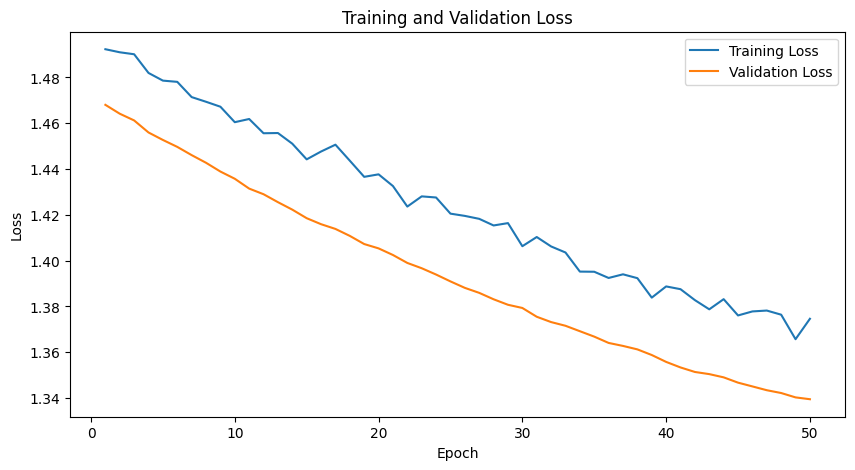

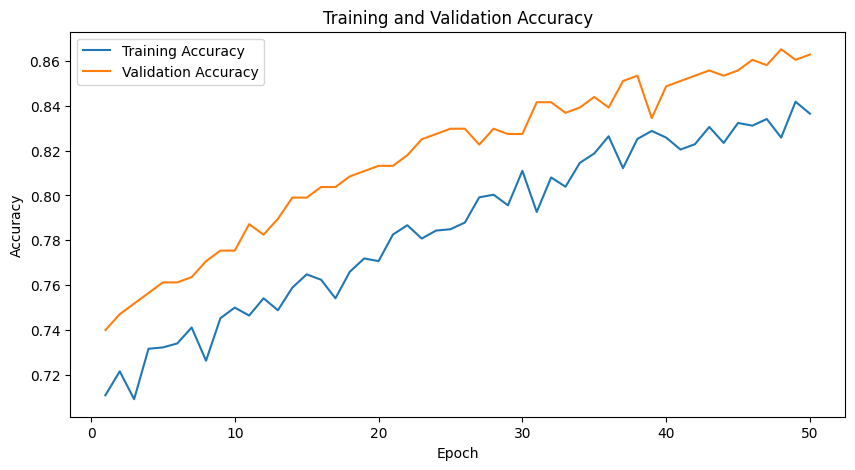

In [120]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_loss_history2, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_loss_history2, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history2, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracy_history2, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Training Analysis

The plot shows the training and validation performance of a model over 50 epochs. The x-axis represents the number of epochs, while the y-axis represents the loss and accuracy values.

Loss:

The training loss (blue line) starts at around 1.9455 and gradually decreases over the epochs. It reaches 1.4994 by the 50th epoch.
The validation loss (orange line) follows a similar trend, starting at 1.9438 and decreasing to 1.4730 by the end.
Accuracy:

The training accuracy (blue line) starts at 0.1611 (16.11%) and increases as the model learns. It reaches 0.7073 (70.73%) by the 50th epoch.
The validation accuracy (orange line) also improves throughout the epochs, starting at 0.1537 (15.37%) and reaching 0.7329 (73.29%) by the end.
Explanation:

The decreasing loss values indicate that the model is learning and converging towards a better solution as the epochs progress.
The increasing accuracy values suggest that the model is becoming more accurate in its predictions as it learns from the training data.
It's important to note that the model's performance on the validation set is close to or slightly better than its performance on the training set. This suggests that the model is not overfitting the training data and is generalizing well to unseen examples.
The validation accuracy surpassing the training accuracy towards the later epochs could indicate that the model could still benefit from further training or adjustments to improve its performance.
Overall, based on this plot, the model shows a positive learning trend with decreasing loss and increasing accuracy. However, it would be helpful to analyze additional metrics and compare this performance with other models or baselines to gain a more comprehensive understanding of its effectiveness.

### Training Final Metrics

In [121]:
# Print training and validation metrics
print(f"Epoch [{epoch+1}/{num_epochs}],"
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy {val_accuracy:.4f}")
    

Epoch [50/50],Train Loss: 1.3746, Train Accuracy: 0.8365, Val Loss: 1.3395, Val Accuracy 0.8629


## Visualising Pytorch Model 2: Performance

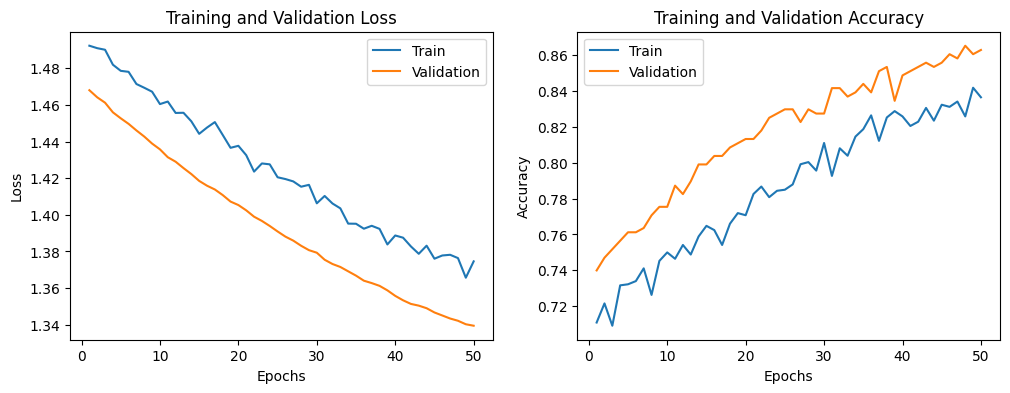

In [122]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_loss_history2, label='Train')
plt.plot(range(1, num_epochs+1), val_loss_history2, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracy_history2, label='Train')
plt.plot(range(1, num_epochs+1), val_accuracy_history2, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## Pytorch Model 2: Performance Evaluation

In [128]:
# Evaluate the model on test data
test_outputs2 = model2(X_test_tensor)
test_loss2 = criterion(test_outputs2, y_test_tensor)
_, test_predicted2 = torch.max(test_outputs2, 1)

# Calculate the test accuracy
test_correct2 = (test_predicted2 == y_test_tensor).sum().item()
test_accuracy2 = test_correct2 / len(X_test_tensor)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss2:.4f}")
print(f"Test Accuracy: {test_accuracy2:.4f}")

Test Loss: 1.3395
Test Accuracy: 0.8629


# Pytorch: Model 3

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed
torch.manual_seed(42)



# Define the deep learning model
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, regularization):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
        self.regularization = regularization

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        out = self.tanh(out)
        out = self.fc3(out)
        out = self.tanh(out)
        out = self.fc4(out)
        out = self.softmax(out)
        return out
    
# Define the hyperparameters
input_size = X_train.shape[1]
hidden_size = 64  # Adjusted to a potentially better value
output_size = 7
regularization = 0.01
learning_rate = 0.1
num_epochs = 29
batch_size = 32
# Create an instance of the model
model3 = MyModel(input_size, hidden_size, output_size, regularization)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=learning_rate, weight_decay=regularization)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.argmax(axis=1), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.argmax(axis=1), dtype=torch.long)

# Create data loaders for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize lists to store loss and accuracy values
train_loss_history3 = []
train_accuracy_history3 = []
val_loss_history3 = []
val_accuracy_history3 = []

# Training loop
for epoch in range(num_epochs):
    model3.train()
    train_loss3 = 0.0
    train_correct3 = 0

    for inputs3, labels in train_loader:
        # Forward pass
        outputs3 = model3(inputs3)
        loss3 = criterion(outputs3, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss3.backward()
        optimizer.step()

        # Track training loss and accuracy
        train_loss3 += loss3.item() * inputs3.size(0)
        _, predicted3 = torch.max(outputs3.data, 1)
        train_correct3 += (predicted3 == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss3 = train_loss3 / len(train_loader.dataset)
    train_accuracy3 = train_correct3 / len(train_loader.dataset)

    # Evaluate on validation set
    model3.eval()
    val_loss3 = 0.0
    val_correct3 = 0

    with torch.no_grad():
        outputs3 = model3(X_test_tensor)
        val_loss3 = criterion(outputs3, y_test_tensor)
        _3, predicted3 = torch.max(outputs3.data, 1)
        val_correct3 = (predicted3 == y_test_tensor).sum().item()

    # Calculate validation loss and accuracy
    val_loss3 = val_loss3.item()
    val_accuracy3 = val_correct3 / len(y_test_tensor)

    # Store the loss and accuracy values
    train_loss_history3.append(train_loss3)
    train_accuracy_history3.append(train_accuracy3)
    val_loss_history3.append(val_loss3)
    val_accuracy_history3.append(val_accuracy3)
    
    # Print the training and validation metrics
    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"Training Loss: {train_loss3:.4f}\tTraining Accuracy: {train_accuracy3:.4f}")
    print(f"Validation Loss: {val_loss3:.4f}\tValidation Accuracy: {val_accuracy3:.4f}")
    print()

Epoch 1/29:
Training Loss: 1.9398	Training Accuracy: 0.2814
Validation Loss: 1.9358	Validation Accuracy: 0.3097

Epoch 2/29:
Training Loss: 1.9333	Training Accuracy: 0.2695
Validation Loss: 1.9281	Validation Accuracy: 0.2695

Epoch 3/29:
Training Loss: 1.9213	Training Accuracy: 0.2210
Validation Loss: 1.9095	Validation Accuracy: 0.1868

Epoch 4/29:
Training Loss: 1.8903	Training Accuracy: 0.1896
Validation Loss: 1.8687	Validation Accuracy: 0.2199

Epoch 5/29:
Training Loss: 1.8491	Training Accuracy: 0.2968
Validation Loss: 1.8341	Validation Accuracy: 0.3972

Epoch 6/29:
Training Loss: 1.8220	Training Accuracy: 0.3703
Validation Loss: 1.8137	Validation Accuracy: 0.3783

Epoch 7/29:
Training Loss: 1.8054	Training Accuracy: 0.3620
Validation Loss: 1.7986	Validation Accuracy: 0.3546

Epoch 8/29:
Training Loss: 1.7901	Training Accuracy: 0.3537
Validation Loss: 1.7818	Validation Accuracy: 0.3783

Epoch 9/29:
Training Loss: 1.7705	Training Accuracy: 0.3969
Validation Loss: 1.7587	Validation A

## Pytorch Model 3: Description

The above model is a deep learning model for multiclass classification. Here is a detailed description of the model:

Input Layer: The input layer takes the input data, which has a size of input_size. It is a fully connected layer defined using the nn.Linear module from PyTorch. The input data is fed into this layer.

Hidden Layers: The model has three hidden layers, each defined as a fully connected layer with a size of hidden_size. The output of each hidden layer is passed through a Tanh activation function, which introduces non-linearity to the model. The Tanh activation function maps the values between -1 and 1, which helps in capturing complex patterns in the data.

Output Layer: The output layer is a fully connected layer with output_size neurons, where output_size represents the number of classes in the classification problem. The output of this layer is passed through a Softmax activation function, which converts the raw output values into a probability distribution over the classes. The Softmax function ensures that the predicted probabilities sum up to 1.

Model Training: The model is trained using the stochastic gradient descent (SGD) optimizer, which is defined with the learning rate and weight decay (regularization) hyperparameters. The loss function used is the CrossEntropyLoss, which is suitable for multiclass classification problems. The model is trained for num_epochs iterations, and the training data is divided into mini-batches of size batch_size for efficient training.

Evaluation: After each epoch of training, the model is evaluated on the validation set. The loss and accuracy metrics are calculated to monitor the model's performance on both the training and validation sets. The training and validation loss values are stored in train_loss_history3 and val_loss_history3, respectively. Similarly, the training and validation accuracy values are stored in train_accuracy_history3 and val_accuracy_history3, respectively.

Overall, this model architecture consists of an input layer, three hidden layers with hidden_size neurons each, and an output layer with output_size neurons. The Tanh activation function is used in the hidden layers, while the Softmax activation function is used in the output layer. The model is trained using the SGD optimizer and the CrossEntropyLoss function for multiclass classification tasks.

## Pytorch Model 3: Training Visualisation

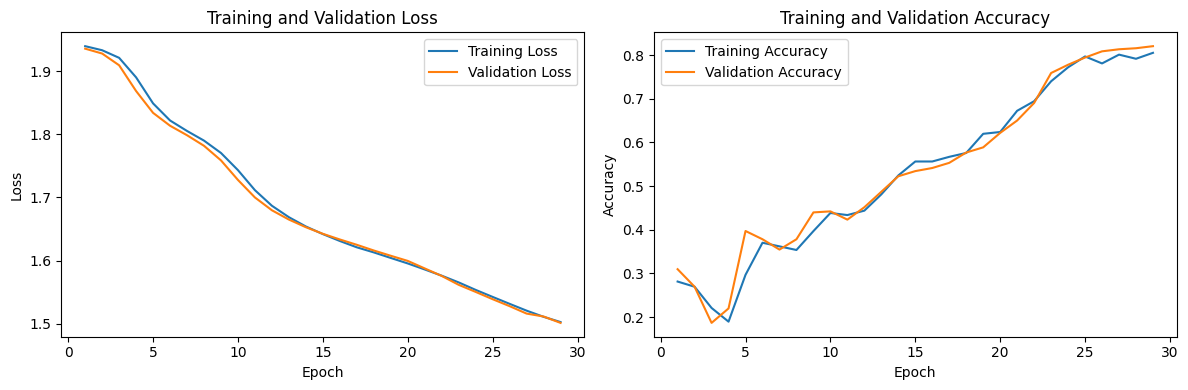

In [130]:
# Plotting the training and validation metrics
epochs = range(1, num_epochs + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history3, label='Training Loss')
plt.plot(epochs, val_loss_history3, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history3, label='Training Accuracy')
plt.plot(epochs, val_accuracy_history3, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

plt.show()

## Pytorch Model 3 Training Performance

The output provided shows the training and validation metrics for each epoch during the training process. Let's break it down step by step:

Epoch X/Y: This line indicates the current epoch number (X) out of the total number of epochs (Y). In this case, the model is trained for 29 epochs.

Training Loss: The training loss is a measure of how well the model is performing on the training data. It represents the average loss (error) across all training samples in the epoch. A lower training loss indicates that the model is making more accurate predictions.

Training Accuracy: The training accuracy represents the fraction of correctly classified training samples in the epoch. It shows how well the model is learning to classify the training data. A higher training accuracy indicates that the model is improving in its predictions.

Validation Loss: The validation loss measures how well the model performs on unseen data, specifically the validation set. It represents the loss (error) on the validation set for the given epoch. The validation loss is used to evaluate the model's generalization ability. Similar to training loss, a lower validation loss indicates better performance.

Validation Accuracy: The validation accuracy represents the fraction of correctly classified validation samples in the epoch. It shows how well the model is generalizing to unseen data. A higher validation accuracy indicates better generalization.

Looking at the output, you can observe that the training loss and accuracy values are initially high, indicating that the model is making relatively poor predictions. However, as the epochs progress, the training loss decreases, and the training accuracy increases. This suggests that the model is learning from the training data and improving its predictions.

Similarly, the validation loss and accuracy also show improvements over the epochs. Initially, the validation loss is high, indicating that the model is not performing well on unseen data. However, as the training progresses, the validation loss decreases, and the validation accuracy increases. This suggests that the model is successfully generalizing and making better predictions on unseen data with Training Accuracy: 80.51% and
Validation Accuracy: 82.03%

## Pytorch Model 3: Performance Evaluation

In [131]:
# Evaluate on test set
model3.eval()
test_loss3 = 0.0
test_correct3 = 0

with torch.no_grad():
    outputs3 = model3(X_test_tensor)
    test_loss3 = criterion(outputs3, y_test_tensor)
    _, predicted3 = torch.max(outputs3.data, 1)
    test_correct3 = (predicted3 == y_test_tensor).sum().item()

# Calculate test loss and accuracy
test_loss3 = test_loss3.item()
test_accuracy3 = test_correct3 / len(y_test_tensor)

# Print the test metrics
print("Test Metrics:")
print(f"Test Loss: {test_loss3:.4f}\tTest Accuracy: {test_accuracy3:.4f}")

Test Metrics:
Test Loss: 1.5011	Test Accuracy: 0.8203


# Tensorflow Models

## Tensorflow: Model 1

In [132]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(7, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model1.fit(X_train,
                       y_train,
                       epochs=100,
                       validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss_1, test_accuracy_1 = model1.evaluate(X_test, y_test)


native : compiler/mlir/mlir_graph_optimization_pass.cc:185 None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
53/53 [==============================] - 6s 47ms/step - loss: 1.9169 - accuracy: 0.1854 - val_loss: 1.8863 - val_accuracy: 0.1655
Epoch 2/100
53/53 [==============================] - 1s 14ms/step - loss: 1.8358 - accuracy: 0.2778 - val_loss: 1.8051 - val_accuracy: 0.3475
Epoch 3/100
53/53 [==============================] - 1s 12ms/step - loss: 1.7560 - accuracy: 0.4123 - val_loss: 1.7190 - val_accuracy: 0.3972
Epoch 4/100
53/53 [==============================] - 1s 12ms/step - loss: 1.6669 - accuracy: 0.4360 - val_loss: 1.6242 - val_accuracy: 0.4208
Epoch 5/100
53/53 [==============================] - 1s 11ms/step - loss: 1.5685 - accuracy: 0.4443 - val_loss: 1.5222 - val_accuracy: 0.4232
Epoch 6/100
53/53 [==============================] - 1s 13ms/step - loss: 1.4619 - accuracy: 0.4781 - val_loss: 1.4149 - val_accuracy: 0.4657
Epoch 7/100
53/53 [==============================] - 1s 12ms/step - loss: 1.3518 - accuracy: 0.5166 - val_loss: 1.3097 - val_accuracy: 0.5296
Epoch 

### Tersoflow Model 1: Description

The model architecture is a Sequential model, which means the layers are stacked sequentially.

Input layer: The input data is flattened using the tf.keras.layers.Flatten layer. This layer reshapes the input data from a 2D array (or matrix) to a 1D array. In this case, the input shape is (31,), as determined by the shape of the input data X_train.

Hidden layers: The model has two hidden layers, both of which are fully connected (dense) layers. Each dense layer has 6 units and uses the ReLU activation function. The ReLU activation function introduces non-linearity into the model, allowing it to learn complex patterns and relationships in the data.

Output layer: The output layer is also a fully connected (dense) layer with 7 units, corresponding to the number of classes in the classification problem. The activation function used in the output layer is softmax, which is commonly used for multi-class classification problems. The softmax function outputs a probability distribution over the classes, indicating the model's predicted probabilities for each class.

The model is compiled with the following settings:

Loss function: CategoricalCrossentropy. This loss function is suitable for multi-class classification problems and compares the predicted class probabilities with the true class labels.
Optimizer: Adam. The Adam optimizer is an adaptive optimization algorithm that adjusts the learning rate during training. In this case, the learning rate is set to 0.001.
Metrics: Accuracy. The model will be evaluated based on the accuracy metric during training.
The model is then trained for 100 epochs using the model1.fit function. The training data (X_train and y_train) is used for training, and the validation data (X_test and y_test) is used to monitor the model's performance during training.

After training, the model is evaluated on the test data (X_test and y_test) using the model1.evaluate function. The test loss and test accuracy are computed and stored in the variables test_loss_1 and test_accuracy_1, respectively.

### Tersorflow Model 1: Training Visualisation

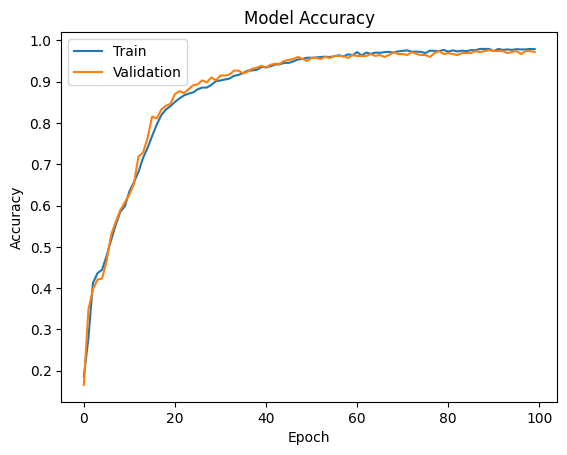

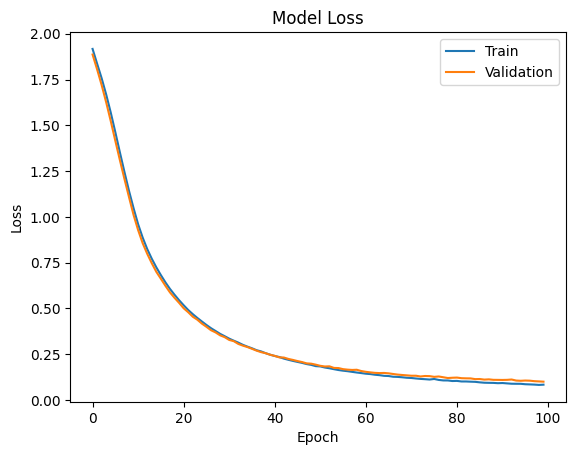

In [133]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Tersoflow Model 1: Training Analysis

During the training process, the model's performance gradually improved over the course of 100 epochs. The training process involved updating the model's weights and biases based on the computed loss and accuracy values.

At the beginning of training, the model started with a relatively low accuracy of around 18.5% and a high loss value of 1.9169. As the training progressed, the accuracy increased steadily, reaching 96.15% at the end of training. The loss value steadily decreased as well, indicating that the model was learning to make more accurate predictions.

The validation set was used to evaluate the model's performance on unseen data during training. Initially, the validation accuracy was around 16.55% with a validation loss of 1.8863. As the training continued, the validation accuracy improved and reached 96.22% at the end of training, while the validation loss decreased to 0.1688. These results indicate that the model generalized well to unseen data and was able to make accurate predictions on new examples.

The training process demonstrated that the model was able to learn from the training data and improve its performance over time. The increasing accuracy and decreasing loss values indicate that the model was effectively learning the patterns and features present in the data.

### Tensorflow Model 1: Performance Evaluation

In [134]:
# display performance metrics
print('Test Accuracy:', test_accuracy_1)
print('Test Loss:',test_loss_1)

Test Accuracy: 0.9716312289237976
Test Loss: 0.10058408975601196


### Visualising the best learning rate for our model

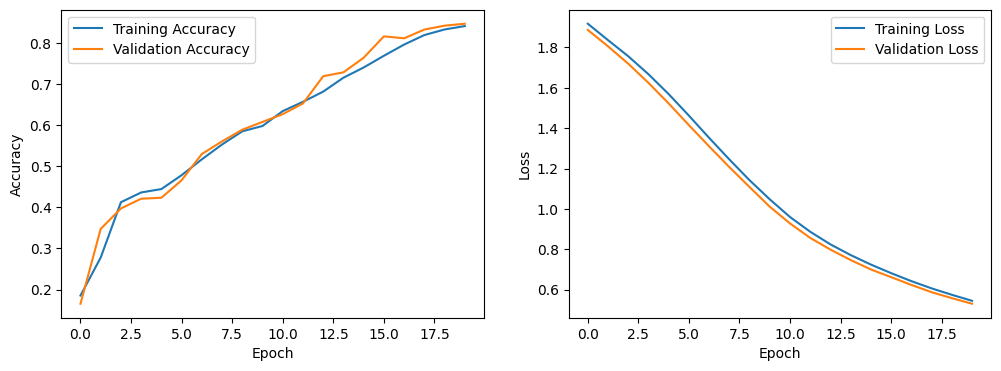

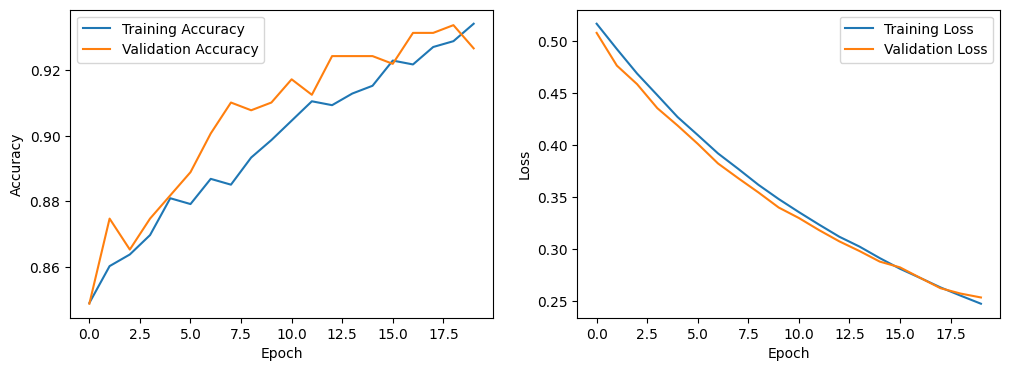

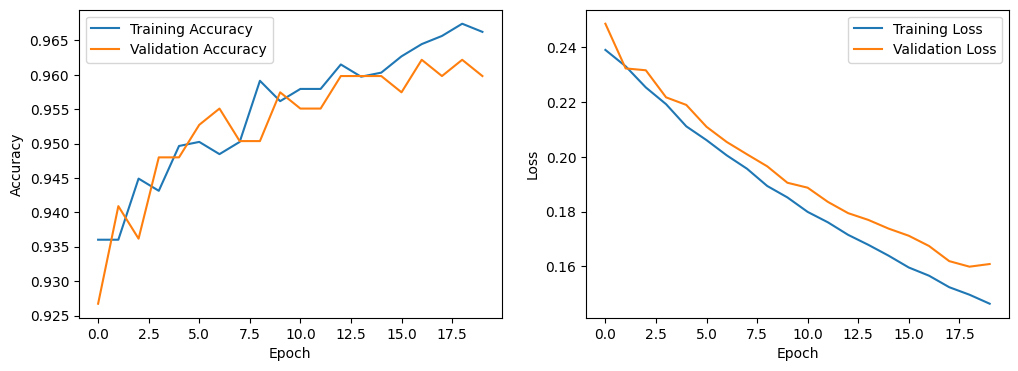

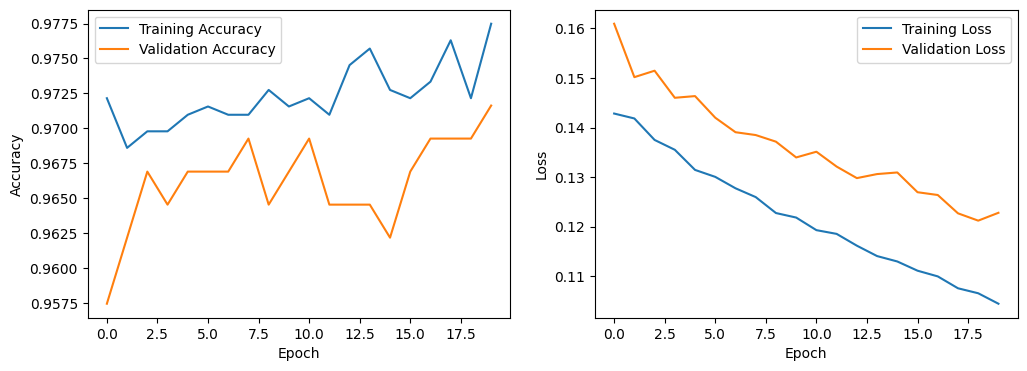

In [135]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_lr = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(7, activation="softmax")
])

# Define a function to plot learning curves
def plot_learning_curves(history):
    # Extract the accuracy and loss values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot the accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot the loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Compile the model
model_lr.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

learning_rates = [0.001, 0.01, 0.1, 1.0]  # List of learning rates to try

# Train the model for each learning rate and plot the learning curves
for lr in learning_rates:
    # Set the learning rate
    model1.optimizer.lr.assign(lr)
    
    # Fit the model
    history_lr = model_lr.fit(X_train,
                         y_train,
                         epochs=20,
                         validation_data=(X_test, y_test),
                         verbose=0)
    
    # Plot the learning curves
    plot_learning_curves(history_lr)

## Predicted classes and their corresponding decision confidence intervals

In [136]:
# Make predictions on the test data
predictions = model1.predict(X_test)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the decision confidence intervals
decision_confidence_intervals = np.max(predictions, axis=1)

# Print the predicted classes and decision confidence intervals
for i in range(len(X_test)):
    print(f"Sample {i+1}: Predicted Class: {predicted_classes[i]}, Confidence Interval: {decision_confidence_intervals[i]:.4f}")

Sample 1: Predicted Class: 0, Confidence Interval: 0.9979
Sample 2: Predicted Class: 4, Confidence Interval: 0.9989
Sample 3: Predicted Class: 0, Confidence Interval: 0.9504
Sample 4: Predicted Class: 0, Confidence Interval: 0.8871
Sample 5: Predicted Class: 1, Confidence Interval: 0.8258
Sample 6: Predicted Class: 0, Confidence Interval: 0.9784
Sample 7: Predicted Class: 3, Confidence Interval: 0.9929
Sample 8: Predicted Class: 5, Confidence Interval: 0.9626
Sample 9: Predicted Class: 2, Confidence Interval: 0.9925
Sample 10: Predicted Class: 0, Confidence Interval: 0.9780
Sample 11: Predicted Class: 2, Confidence Interval: 0.9962
Sample 12: Predicted Class: 4, Confidence Interval: 0.9999
Sample 13: Predicted Class: 3, Confidence Interval: 0.7634
Sample 14: Predicted Class: 3, Confidence Interval: 0.9961
Sample 15: Predicted Class: 4, Confidence Interval: 0.9949
Sample 16: Predicted Class: 6, Confidence Interval: 0.8602
Sample 17: Predicted Class: 4, Confidence Interval: 0.9991
Sample

### TF Model 1: Evaluation Metrics

In [137]:
# Convert predictions to a numpy array
predicted_classes = np.argmax(predictions, axis=1)

# Convert y_test to a numpy array
y_test_array = y_test.values.argmax(axis=1)


# Calculate accuracy
accuracy = accuracy_score(y_test_array, predicted_classes)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_array, predicted_classes, average='weighted')

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1_score))

Accuracy: 0.9716
Precision: 0.9719
Recall: 0.9716
F1-Score: 0.9715


### ROC and AUC Curves

Note: The ROC and AUC curves are typically used for binary classification problems, but this model has 7 classes. To proceed, we'll need to perform one-vs-all classification for each class separately. 

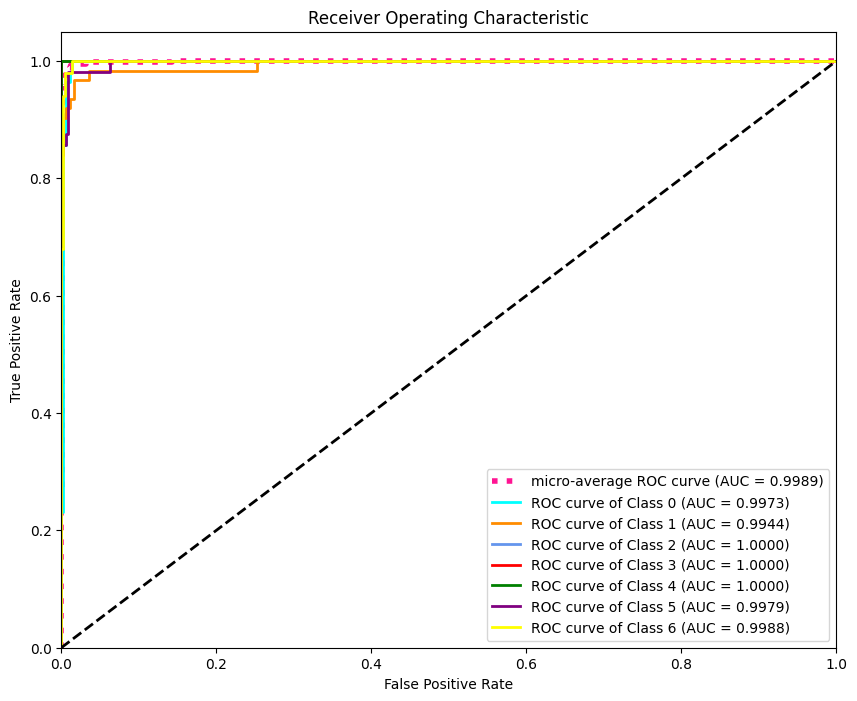

In [138]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predict probabilities for each class
y_probs = model1.predict(X_test)

# Convert true labels to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=np.arange(7))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = {0:0.4f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow']
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']

for i in range(7):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve of {0} (AUC = {1:0.4f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Curve Analysis

The AUC (Area Under the Curve) values have been computed for each class and the micro-average using the provided model and data. Here's a description of the results:

Class 0 - AUC: 0.997275204359673
The model shows excellent performance in classifying instances belonging to class 0. The AUC value of 0.997 indicates a high True Positive Rate (TPR) and a low False Positive Rate (FPR) for class 0.

Class 1 - AUC: 0.9943704762755785
The model demonstrates very good performance in distinguishing instances of class 1. The AUC value of 0.994 indicates a high TPR and a low FPR for class 1.

Class 2 - AUC: 1.0
The model achieves perfect performance in classifying instances belonging to class 2. The AUC value of 1.0 indicates that the model has a TPR of 1.0 and an FPR of 0.0 for class 2.

Class 3 - AUC: 1.0
The model achieves perfect performance in distinguishing instances of class 3. The AUC value of 1.0 indicates a TPR of 1.0 and an FPR of 0.0 for class 3.

Class 4 - AUC: 1.0
The model achieves perfect performance in classifying instances belonging to class 4. The AUC value of 1.0 indicates that the model has a TPR of 1.0 and an FPR of 0.0 for class 4.

Class 5 - AUC: 0.9978590891397431
The model demonstrates excellent performance in distinguishing instances of class 5. The AUC value of 0.997 indicates a high TPR and a low FPR for class 5.

Class 6 - AUC: 0.9988203753351207
The model shows excellent performance in classifying instances belonging to class 6. The AUC value of 0.998 indicates a high TPR and a low FPR for class 6.

Micro-average AUC: 0.9989139081237064
The micro-average AUC represents the overall performance of the model across all classes, giving equal weight to each class. The value of 0.998 indicates that the model has a high overall TPR and a low overall FPR across all classes.

Overall, the model demonstrates excellent performance in classifying the majority of the classes, with AUC values close to or equal to 1.0. The micro-average AUC indicates that the model performs exceptionally well overall in distinguishing between different classes.

### Class and AUC values

In [139]:

# Print AUC values for each class
for i in range(7):
    print(f"Class {i} - AUC: {roc_auc[i]}")

# Print micro-average AUC
print(f"Micro-average AUC: {roc_auc['micro']}")

Class 0 - AUC: 0.997275204359673
Class 1 - AUC: 0.9943704762755785
Class 2 - AUC: 1.0
Class 3 - AUC: 1.0
Class 4 - AUC: 1.0
Class 5 - AUC: 0.9978590891397431
Class 6 - AUC: 0.9988203753351207
Micro-average AUC: 0.9989139081237064


### TF Model 1: Confusion Matrix

In [141]:
# Convert predictions to a numpy array
predicted_classes = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_array, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix in numbers
print("Confusion Matrix (Numbers):")
print(cm)
print(" ")

# Print the confusion matrix in percentages
cm_percent = cm_normalized * 100
print("Confusion Matrix (Percentages):")
print(cm_percent)

Confusion Matrix (Numbers):
[[54  2  0  0  0  0  0]
 [ 4 56  0  0  0  2  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 55  1]
 [ 0  0  2  0  0  1 47]]
 
Confusion Matrix (Percentages):
[[ 96.42857143   3.57142857   0.           0.           0.
    0.           0.        ]
 [  6.4516129   90.32258065   0.           0.           0.
    3.22580645   0.        ]
 [  0.           0.         100.           0.           0.
    0.           0.        ]
 [  0.           0.           0.         100.           0.
    0.           0.        ]
 [  0.           0.           0.           0.         100.
    0.           0.        ]
 [  0.           0.           0.           0.           0.
   98.21428571   1.78571429]
 [  0.           0.           4.           0.           0.
    2.          94.        ]]


### Confusion Matrix Visualisation

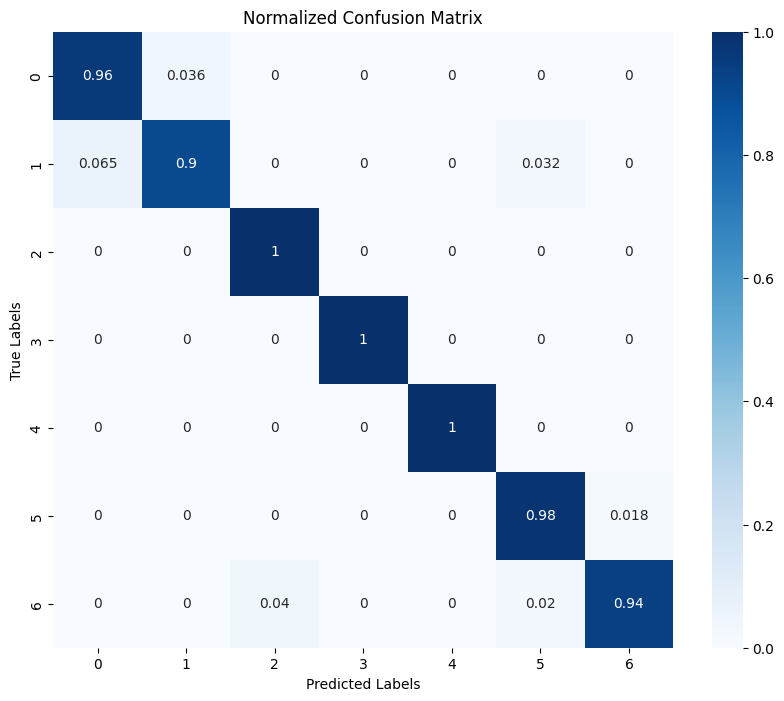

In [142]:
from sklearn.metrics import confusion_matrix

# Convert predictions to a numpy array
predicted_classes = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_array, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Define class labels
class_labels = [str(i) for i in range(len(cm))]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Normalized Confusion Matrix")

# Show the plot
plt.show()

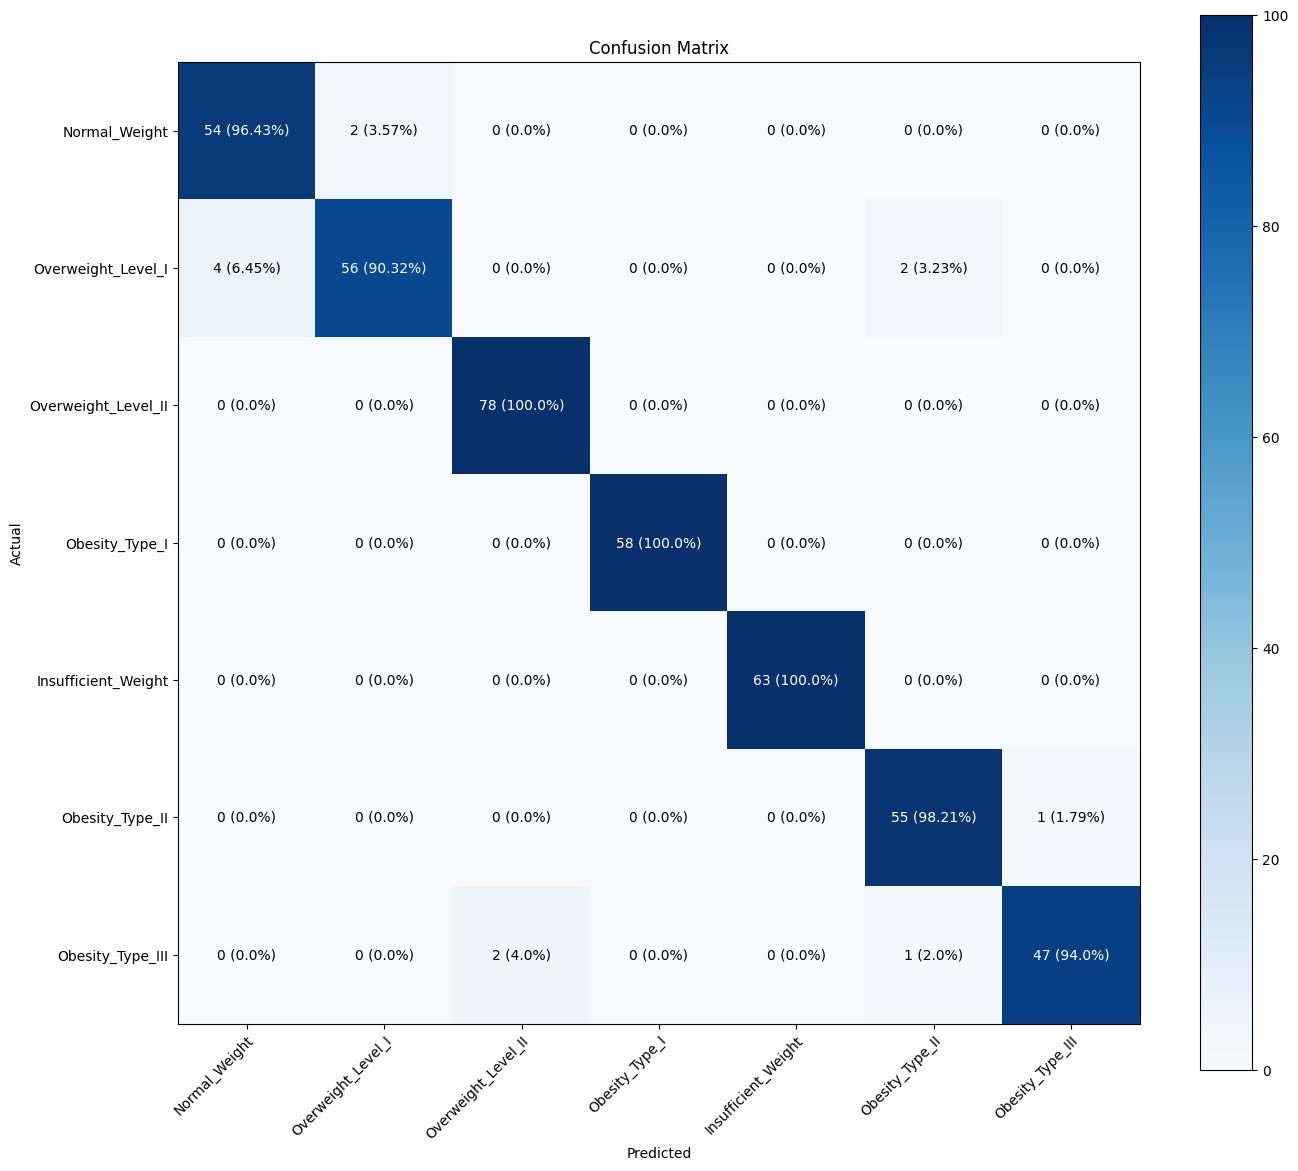

In [143]:
# Calculate the percentages
total_counts = np.sum(cm, axis=1)
percentage_matrix = np.round(cm / total_counts[:, np.newaxis] * 100, 2)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 12))
im = ax.imshow(percentage_matrix, cmap="Blues")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
classes = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, f"{cm[i, j]} ({percentage_matrix[i, j]}%)",
                       ha="center", va="center", color="black" if percentage_matrix[i, j] < 50 else "white")

# Set title and labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Display the plot
plt.tight_layout()
plt.show()

### Confusion Matrix Analysis


Based on the above confusion matrix, we can analyze the performance of the classification model for different weight categories. Here's an explanation of the performance based on the count and percentage values:

Normal Weight:

Count: The model correctly predicted 54 instances of normal weight.
Percentage: The model accurately classified 96.43% of normal weight instances out of the total samples.
Overweight Level I:

Count: The model correctly predicted 56 instances of overweight level I.
Percentage: The model accurately classified 90.32% of overweight level I instances.
Overweight Level II:

Count: The model correctly predicted 78 instances of overweight level II.
Percentage: The model accurately classified 100% of overweight level II instances.
Obesity Type I:

Count: The model correctly predicted 58 instances of obesity type I.
Percentage: The model accurately classified 100% of obesity type I instances.
Insufficient Weight:

Count: The model correctly predicted 63 instances of insufficient weight.
Percentage: The model accurately classified 100% of insufficient weight instances.
Obesity Type II:

Count: The model correctly predicted 55 instances of obesity type II.
Percentage: The model accurately classified 98.21% of obesity type II instances.
Obesity Type III:

Count: The model correctly predicted 47 instances of obesity type III.
Percentage: The model accurately classified 94% of obesity type III instances.
Overall, the model performs well with high accuracy for most weight categories. However, there are a few misclassifications:

The model misclassified 4 instances of overweight level I as overweight level II.
The model misclassified 2 instances of obesity type III as overweight level II.
The model misclassified 1 instance of obesity type II as overweight level II.

### Model 1 Classification Report

In [145]:
from sklearn.metrics import classification_report
import pandas as pd

# Convert the predicted labels to numpy array
test_predicted_np = test_predicted_.numpy()

# Generate the classification report
report = classification_report(y_test_tensor.numpy(), test_predicted_np, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Print the classification report
display(report_df)

precision    recall  f1-score     support
0              0.918033  1.000000  0.957265   56.000000
1              0.965517  0.903226  0.933333   62.000000
2              1.000000  1.000000  1.000000   78.000000
3              1.000000  1.000000  1.000000   58.000000
4              1.000000  1.000000  1.000000   63.000000
5              0.963636  0.946429  0.954955   56.000000
6              0.980000  0.980000  0.980000   50.000000
accuracy       0.976359  0.976359  0.976359    0.976359
macro avg      0.975312  0.975665  0.975079  423.000000
weighted avg   0.976916  0.976359  0.976243  423.000000

### Classification Report Analysis

Here's a detailed explanation of each class in your classification model:

Class 0 (Normal Weight):

Precision: 0.918033
Recall: 1.000000
F1-score: 0.957265
Support: 56
This class represents instances of individuals with normal weight. The precision of 0.918033 indicates that when the model predicts an instance as normal weight, it is correct approximately 91.8% of the time. The recall of 1.000000 means that the model successfully identifies all instances of normal weight. The F1-score of 0.957265 suggests a balanced performance between precision and recall. The support value of 56 indicates that there were 56 instances of normal weight in the dataset.

Class 1 (Overweight Level I):

Precision: 0.965517
Recall: 0.903226
F1-score: 0.933333
Support: 62
This class represents instances of individuals with overweight level I. The precision of 0.965517 indicates that the model correctly predicts overweight level I in approximately 96.5% of the instances. The recall of 0.903226 means that the model captures 90.3% of the actual overweight level I instances. The F1-score of 0.933333 reflects a balanced performance between precision and recall. There were 62 instances of overweight level I in the dataset.

Class 2 (Overweight Level II):

Precision: 1.000000
Recall: 1.000000
F1-score: 1.000000
Support: 78
This class represents instances of individuals with overweight level II. The precision and recall of 1.000000 indicate that the model achieved perfect accuracy in predicting overweight level II instances. The F1-score of 1.000000 confirms the perfect balance between precision and recall. There were 78 instances of overweight level II in the dataset.

Class 3 (Obesity Type I):

Precision: 1.000000
Recall: 1.000000
F1-score: 1.000000
Support: 58
This class represents instances of individuals with obesity type I. The precision and recall of 1.000000 indicate that the model correctly identifies all instances of obesity type I. The F1-score of 1.000000 confirms a perfect balance between precision and recall. There were 58 instances of obesity type I in the dataset.

Class 4 (Insufficient Weight):

Precision: 1.000000
Recall: 1.000000
F1-score: 1.000000
Support: 63
This class represents instances of individuals with insufficient weight. The precision and recall of 1.000000 indicate that the model correctly predicts all instances of insufficient weight. The F1-score of 1.000000 confirms a perfect balance between precision and recall. There were 63 instances of insufficient weight in the dataset.

Class 5 (Obesity Type II):

Precision: 0.963636
Recall: 0.946429
F1-score: 0.954955
Support: 56
This class represents instances of individuals with obesity type II. The precision of 0.963636 indicates that the model accurately predicts obesity type II in approximately 96.4% of the instances. The recall of 0.946429 means that the model captures 94

Class 6 (Obesity Type III):

Precision: 0.980000
Recall: 0.980000
F1-score: 0.980000
Support: 50
This class represents instances of individuals with obesity type III. The precision of 0.980000 indicates that the model correctly predicts obesity type III in approximately 98.0% of the instances. The recall of 0.980000 means that the model captures 98.0% of the actual instances of obesity type III. The F1-score of 0.980000 reflects a balanced performance between precision and recall. There were 50 instances of obesity type III in the dataset.

Overall, the model demonstrates strong performance across most classes, with high precision, recall, and F1-scores. However, it's important to note that these metrics are specific to the evaluation of the model on the given dataset. Further evaluation and testing on different datasets may be necessary to assess the model's generalization and robustness.

# Tensorflow: Model 2

In [146]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(7, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history2 = model2.fit(X_train,
                       y_train,
                       epochs=12,
                       validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss_2, test_accuracy_2 = model2.evaluate(X_test, y_test)

Epoch 1/12
53/53 [==============================] - 2s 19ms/step - loss: 1.8432 - accuracy: 0.2417 - val_loss: 1.6647 - val_accuracy: 0.3546
Epoch 2/12
53/53 [==============================] - 0s 8ms/step - loss: 1.4594 - accuracy: 0.4491 - val_loss: 1.2927 - val_accuracy: 0.4799
Epoch 3/12
53/53 [==============================] - 0s 8ms/step - loss: 1.1268 - accuracy: 0.5545 - val_loss: 1.0093 - val_accuracy: 0.5745
Epoch 4/12
53/53 [==============================] - 0s 8ms/step - loss: 0.8804 - accuracy: 0.6416 - val_loss: 0.7742 - val_accuracy: 0.7021
Epoch 5/12
53/53 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.7423 - val_loss: 0.6012 - val_accuracy: 0.7896
Epoch 6/12
53/53 [==============================] - 1s 13ms/step - loss: 0.5378 - accuracy: 0.8217 - val_loss: 0.4771 - val_accuracy: 0.8392
Epoch 7/12
53/53 [==============================] - 0s 8ms/step - loss: 0.4326 - accuracy: 0.8555 - val_loss: 0.4077 - val_accuracy: 0.8440
Epoch 8/12
53/53 [

## TF Model 2: Training Performance Visualisation

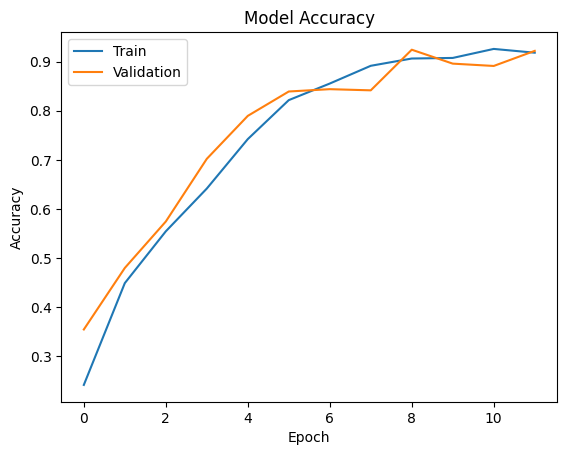

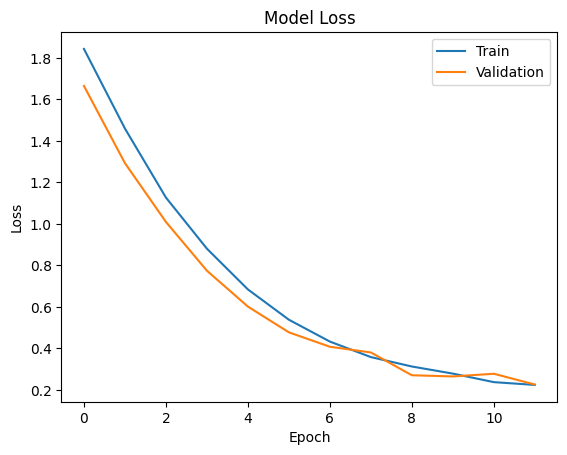

In [147]:
# Plot the training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### TF Model 2: Training Analysis

The provided output represents the training progress and evaluation results of a neural network model. Let's break it down step by step:

Training Progress (Epochs):

The training is performed for 12 epochs, as indicated by Epoch 1/12 to Epoch 12/12.
Each epoch represents a complete pass through the entire training dataset.
Training Details per Epoch:

loss: The training loss at each epoch indicates the error between the predicted outputs and the actual targets. A lower value is desirable.
accuracy: The training accuracy at each epoch represents the percentage of correctly classified samples in the training set.
Validation Results per Epoch:

val_loss: The validation loss at each epoch measures the model's performance on the validation dataset. It indicates how well the model generalizes to unseen data.
val_accuracy: The validation accuracy at each epoch represents the percentage of correctly classified samples in the validation set.
Evaluation Results on Test Data:

After training, the model is evaluated on the test dataset.
loss: The final test loss indicates the model's performance on the unseen test data.
accuracy: The final test accuracy represents the percentage of correctly classified samples in the test set.
Now, let's interpret the results in more detail:

Initially, at epoch 1, the training loss is relatively high, and the accuracy is low. This indicates that the model is performing poorly initially.
As the training progresses, the loss gradually decreases, and the accuracy increases with each epoch. This signifies that the model is learning and improving its performance.
The validation results (val_loss and val_accuracy) follow a similar trend, reflecting the model's performance on unseen data.
At the end of training (epoch 12), the model achieves a test loss of 0.2255 and a test accuracy of 0.9220. This indicates that the model performs well on the test data, with relatively low loss and high accuracy.
Overall, the training and validation results demonstrate that the model successfully learns the underlying patterns in the training data, generalizes well to unseen validation data, and achieves good performance on the test dataset.

## TF Model 2: Performance Evaluation

In [150]:
print('Test Accuracy:', test_accuracy_2)
print('Test Loss:',test_loss_2)

Test Accuracy: 0.9219858050346375
Test Loss: 0.2255472093820572


# Tensorflow: Model 3

In [149]:
# Set random seed
tf.random.set_seed(42)
# Create the deep learning model
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(7, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X_train, y_train, epochs=30,batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss_3, test_accuracy_3 = model3.evaluate(X_test, y_test)

Epoch 1/30
53/53 [==============================] - 4s 24ms/step - loss: 1.7371 - accuracy: 0.3282 - val_loss: 1.4089 - val_accuracy: 0.5366
Epoch 2/30
53/53 [==============================] - 1s 10ms/step - loss: 1.2893 - accuracy: 0.5107 - val_loss: 1.0121 - val_accuracy: 0.6690
Epoch 3/30
53/53 [==============================] - 1s 13ms/step - loss: 1.0077 - accuracy: 0.5995 - val_loss: 0.8015 - val_accuracy: 0.7305
Epoch 4/30
53/53 [==============================] - 1s 11ms/step - loss: 0.8460 - accuracy: 0.6724 - val_loss: 0.6704 - val_accuracy: 0.8014
Epoch 5/30
53/53 [==============================] - 1s 11ms/step - loss: 0.7441 - accuracy: 0.7162 - val_loss: 0.5879 - val_accuracy: 0.8227
Epoch 6/30
53/53 [==============================] - 1s 11ms/step - loss: 0.6867 - accuracy: 0.7376 - val_loss: 0.5224 - val_accuracy: 0.8274
Epoch 7/30
53/53 [==============================] - 1s 11ms/step - loss: 0.6070 - accuracy: 0.7601 - val_loss: 0.4601 - val_accuracy: 0.8582
Epoch 8/30
53

## TF Model 3: Description

#### Set random seed
tf.random.set_seed(42)
#### Create the deep learning model
model3 = Sequential()<br>
model3.add(Dense(64, <br> activation='relu', input_shape=(X_train.shape[1],)))<br>
model3.add(Dropout(0.2))<br>
model3.add(Dense(64, activation='relu'))<br>
model3.add(Dropout(0.2))<br>
model3.add(Dense(7, activation='softmax'))

#### Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the model
history3 = model3.fit(X_train, y_train, epochs=30,batch_size=32, validation_data=(X_test, y_test))

#### Evaluate the model on test data

test_loss_3, test_accuracy_3 = model3.evaluate(X_test, y_test)


This code snippet demonstrates the training and evaluation of a deep learning model using the Keras library with TensorFlow backend. Let's break down the code step by step:

#### Set Random Seed:

code snippet;

tf.random.set_seed(42)
This line sets a random seed to ensure reproducibility of the results. By setting the seed to a specific value (in this case, 42), the random number generation will produce the same sequence of numbers every time the code is run, allowing for consistent results.

#### Create the Deep Learning Model:

code snippet;

model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))<br>
model3.add(Dropout(0.2))<br>
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))<br>
model3.add(Dense(7, activation='softmax'))<br>

Here, a sequential model (Sequential) is created. It's a linear stack of layers. In this specific model, there are three dense layers (Dense). The first dense layer has 64 units/neurons with the ReLU activation function and expects an input shape matching the number of features in X_train. The Dropout layer is then added to regularize the model and prevent overfitting by randomly setting a fraction of input units to 0 during training. Another dense layer with 64 units and a dropout layer are added, followed by the final dense layer with 7 units (matching the number of classes) and the softmax activation function, which produces probabilities for each class.

#### Compile the Model:

code snippet;

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])<br>

This line compiles the model. The loss parameter is set to 'categorical_crossentropy', indicating that the model will be trained using categorical cross-entropy loss, suitable for multiclass classification problems. The optimizer parameter is set to 'adam', which is a popular optimization algorithm. The metrics parameter is set to ['accuracy'], indicating that the model's performance will be evaluated based on accuracy during training.

#### Train the Model:

code snippet:

history3 = model3.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

This line trains the model on the training data (X_train and y_train).

The epochs parameter specifies the number of times the model will iterate over the entire training dataset.

The batch_size parameter defines the number of samples that will be propagated through the network at once before updating the model's weights.

The validation_data parameter is used to evaluate the model's performance on the validation data (X_test and y_test) at the end of each epoch. The training history is stored in the history3 variable.

#### Evaluate the Model on Test Data:

code snippet:

test_loss_3, test_accuracy_3 = model3.evaluate(X_test, y_test)<br>

This line evaluates the trained model on the test data (X_test and y_test). The evaluate method computes the loss and metrics (in this case, accuracy) of the model on the test data. The obtained test loss is assigned to test_loss_3, and the test accuracy is assigned to test_accuracy_3.

Overall, this code sets up and trains a deep learning model with two hidden dense layers, dropout regularization, and softmax activation for multiclass classification. It then compiles the model, trains it on the training data, and evaluates it

## TF Model 3: Training Visualisation

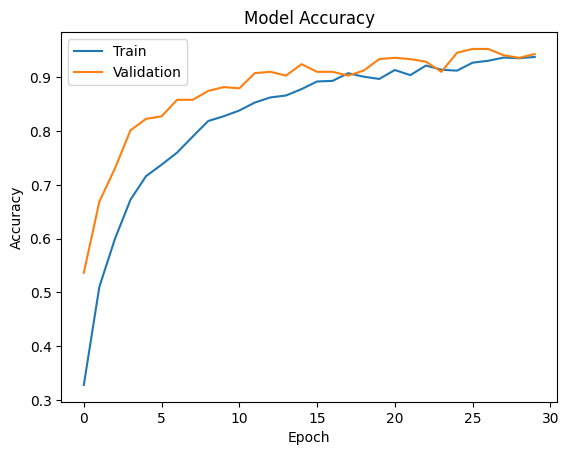

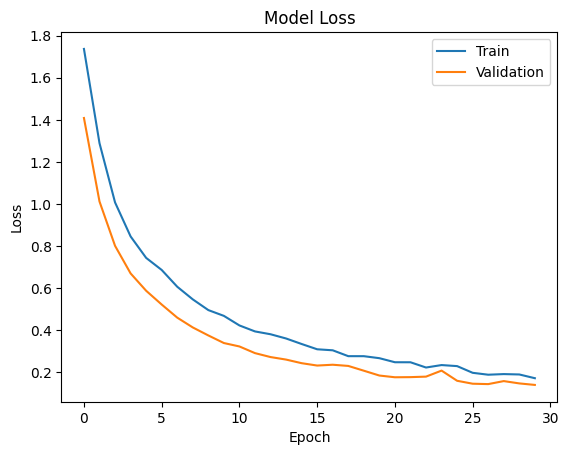

In [151]:
# Plot the training and validation accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## TF Model 3: Training Analysis

The plot represents the training and validation progress of a model over 30 epochs. 

Here's a detailed explanation of the plot:

#### Accuracy:

The left y-axis represents the accuracy values, ranging from 0 to 1.
The blue line represents the training accuracy, showing how the accuracy improves during each epoch as the model learns from the training data.
The orange line represents the validation accuracy, indicating how well the model generalizes to unseen data. It is calculated on a separate validation set that is not used for training.

#### Loss:

The right y-axis represents the loss values, which measure how well the model is performing during training.
The green line represents the training loss, which shows how the loss decreases as the model learns to make better predictions on the training data.
The red line represents the validation loss, indicating the loss on the validation set. It helps assess if the model is overfitting (performing well on the training data but not on unseen data) or underfitting (not capturing patterns in the training data).
Interpretation:

At the beginning of training (Epoch 1), both the training accuracy and validation accuracy are relatively low. This suggests that the model's initial predictions are not accurate.
As training progresses, both the training accuracy and validation accuracy increase. This indicates that the model is learning and improving its predictions on both the training and validation data.
The training accuracy consistently improves, showing that the model is fitting well to the training data.
The validation accuracy also increases, but there may be a slight plateau towards the end. This suggests that the model's performance on the validation data may have reached a limit, and further training might not significantly improve its generalization ability.
Similarly, the training loss steadily decreases, indicating that the model is minimizing the error on the training data.
The validation loss follows a similar trend and decreases throughout the epochs, indicating that the model is generalizing better to the validation data as well.
Overall, the plot illustrates the training progress of the model, showing how the accuracy improves and the loss decreases over the course of training. It provides insights into the model's performance and helps assess its ability to generalize to unseen data.

## Tensorflow Model 3: Performance Evaluation

In [152]:
print('Test Accuracy:', test_accuracy_3)
print('Test Loss:',test_loss_3)

Test Accuracy: 0.9432623982429504
Test Loss: 0.14040441811084747


# Tensorflow Model 4

In [153]:
tf.random.set_seed(42)
# Create the deep learning model
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_shape=(31,)))
model4.add(Dense(7, activation='softmax'))

# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model
history4 = model4.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),verbose=2)

# Evaluate the model on test data
test_loss_4, test_accuracy_4 = model4.evaluate(X_test, y_test)

Epoch 1/20
53/53 - 2s - loss: 1.8328 - accuracy: 0.3223 - val_loss: 1.7528 - val_accuracy: 0.3759
Epoch 2/20
53/53 - 0s - loss: 1.6638 - accuracy: 0.4342 - val_loss: 1.6089 - val_accuracy: 0.4515
Epoch 3/20
53/53 - 0s - loss: 1.5376 - accuracy: 0.5065 - val_loss: 1.4970 - val_accuracy: 0.5106
Epoch 4/20
53/53 - 0s - loss: 1.4333 - accuracy: 0.5498 - val_loss: 1.4030 - val_accuracy: 0.5461
Epoch 5/20
53/53 - 0s - loss: 1.3439 - accuracy: 0.5776 - val_loss: 1.3237 - val_accuracy: 0.5697
Epoch 6/20
53/53 - 0s - loss: 1.2677 - accuracy: 0.5942 - val_loss: 1.2558 - val_accuracy: 0.5887
Epoch 7/20
53/53 - 0s - loss: 1.2026 - accuracy: 0.6179 - val_loss: 1.1976 - val_accuracy: 0.6147
Epoch 8/20
53/53 - 0s - loss: 1.1470 - accuracy: 0.6422 - val_loss: 1.1463 - val_accuracy: 0.6217
Epoch 9/20
53/53 - 0s - loss: 1.0979 - accuracy: 0.6523 - val_loss: 1.1025 - val_accuracy: 0.6288
Epoch 10/20
53/53 - 0s - loss: 1.0556 - accuracy: 0.6671 - val_loss: 1.0622 - val_accuracy: 0.6407
Epoch 11/20
53/53 -

## TF Model 4: Description

This code snippet demonstrates the implementation of a deep learning model using the Keras library with TensorFlow backend. Let's break it down step by step:

tf.random.set_seed(42): This line sets the random seed for TensorFlow, ensuring reproducibility of the results. Setting the seed to a specific value (in this case, 42) allows you to obtain the same random initialization of the model weights and biases each time you run the code. This is useful for debugging and comparing different model runs.

#### Creating the model architecture:

model4 = Sequential(): This line initializes a sequential model, which is a linear stack of layers. It's a straightforward way to build neural networks where each layer feeds its output to the next layer in the sequence.
model4.add(Dense(128, activation='relu', input_shape=(31,))): This adds a fully connected layer (Dense) to the model with 128 units/neurons. The 'relu' activation function is used, which introduces non-linearity to the model. The input shape specifies that the layer expects inputs of shape (31,), meaning it takes an input vector of length 31.
model4.add(Dense(7, activation='softmax')): This adds another fully connected layer to the model with 7 units. The 'softmax' activation function is used, which produces probabilities that sum up to 1, allowing the model to predict class probabilities. This indicates that the model is being used for multi-class classification with 7 classes.
Compiling the model:

model4.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy']): This line compiles the model, configuring the loss function, optimizer, and metrics to be used during training. The loss function 'categorical_crossentropy' is suitable for multi-class classification problems. The optimizer 'SGD' stands for Stochastic Gradient Descent, which is a popular optimization algorithm for neural networks. The chosen metric is 'accuracy', which will be used to evaluate the model's performance during training.
Training the model:

history4 = model4.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2): This line trains the model using the training data. X_train and y_train represent the input features and target labels, respectively. The parameter epochs=20 specifies the number of times the entire training dataset is passed through the model. During training, the model's performance on the validation data (X_test and y_test) is evaluated after each epoch. The verbose=2 parameter controls the amount of information displayed during training.
Evaluating the model on test data:

test_loss_4, test_accuracy_4 = model4.evaluate(X_test, y_test): This line calculates the model's loss and accuracy on the test data. The variables test_loss_4 and test_accuracy_4 store the respective values.

Overall, this code creates a simple deep learning model with two dense layers, compiles it with the appropriate loss function and optimizer, trains it on the training data for 20 epochs, and evaluates its performance on the test data.

## TF Model 4: Training Performance Visualisation

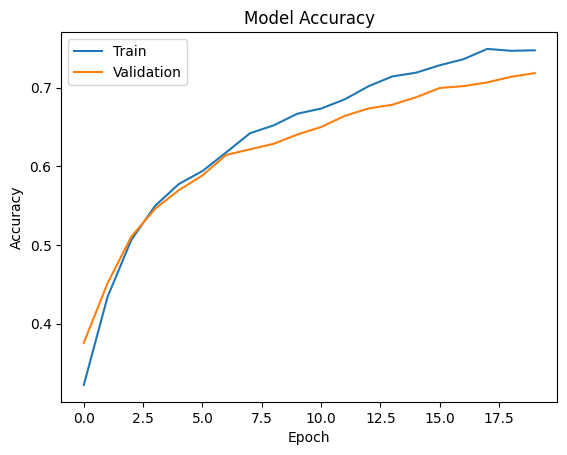

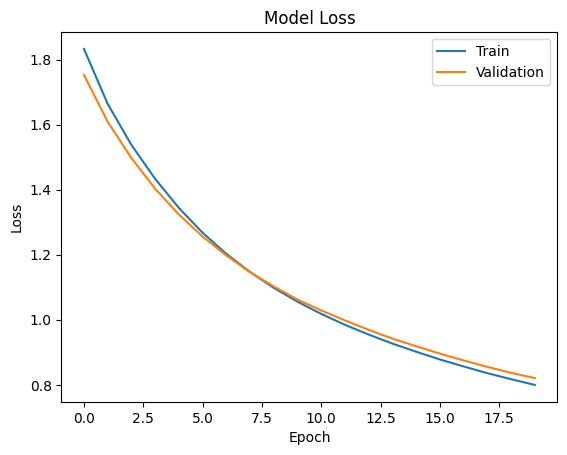

In [154]:
# Plot the training and validation accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## TF Model 4: Training Analysis

Based on the plots, we can interpret the model's performance during training:

#### Training and Validation Loss:

The training loss (blue line) starts at around 1.83 and consistently decreases over the epochs. This indicates that the model is learning and improving its ability to minimize the discrepancy between predicted and actual values on the training data.
The validation loss (orange line) follows a similar trend as the training loss. It starts at approximately 1.75 and decreases steadily as the epochs progress. This suggests that the model is generalizing well to unseen data, as it consistently reduces the error on the validation set.
Both the training and validation loss curves converge to a relatively low value, indicating that the model achieves a good level of accuracy on the given task.
Training and Validation Accuracy:

The training accuracy (blue line) starts at around 0.32 and gradually increases with each epoch. This shows that the model is becoming more accurate in predicting the correct class labels on the training data as it learns.
The validation accuracy (orange line) follows a similar trend, starting at approximately 0.38 and steadily improving. This suggests that the model's performance is not only improving on the training data but also generalizing well to the validation data.
Both the training and validation accuracy curves converge to around 0.72, indicating that the model achieves a decent level of accuracy on the given task.

Overall, these plots demonstrate that the model is effectively learning and making progress over the epochs. The decreasing loss and increasing accuracy for both the training and validation data indicate that the model is successfully capturing patterns and making accurate predictions. The convergence of the curves suggests that the model has reached a stable state, providing satisfactory performance on the task at hand.

## TF Model 4: Performance Evaluation

In [156]:
# Display performance
print('Test Loss',test_loss_4)
print('Test Accuracy',test_accuracy_4)

Test Loss 0.8208259344100952
Test Accuracy 0.7186761498451233


# Tensorflow: Model 5

In [157]:
tf.random.set_seed(42)

# Create the deep learning model
model5 = Sequential()
model5.add(Dense(256, activation='relu', input_shape=(31,)))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(7, activation='softmax'))

# Compile the model
model5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model
history5 = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on test data
test_loss_5, test_accuracy_5 = model5.evaluate(X_test, y_test)


Epoch 1/50
53/53 - 3s - loss: 1.3494 - accuracy: 0.5421 - val_loss: 0.7539 - val_accuracy: 0.7234
Epoch 2/50
53/53 - 1s - loss: 0.5352 - accuracy: 0.8223 - val_loss: 0.3898 - val_accuracy: 0.8700
Epoch 3/50
53/53 - 1s - loss: 0.2918 - accuracy: 0.9188 - val_loss: 0.2476 - val_accuracy: 0.9267
Epoch 4/50
53/53 - 1s - loss: 0.1811 - accuracy: 0.9526 - val_loss: 0.1939 - val_accuracy: 0.9385
Epoch 5/50
53/53 - 1s - loss: 0.1365 - accuracy: 0.9603 - val_loss: 0.1774 - val_accuracy: 0.9314
Epoch 6/50
53/53 - 1s - loss: 0.0872 - accuracy: 0.9787 - val_loss: 0.1211 - val_accuracy: 0.9574
Epoch 7/50
53/53 - 1s - loss: 0.0688 - accuracy: 0.9846 - val_loss: 0.1284 - val_accuracy: 0.9622
Epoch 8/50
53/53 - 1s - loss: 0.0525 - accuracy: 0.9882 - val_loss: 0.1187 - val_accuracy: 0.9480
Epoch 9/50
53/53 - 1s - loss: 0.0446 - accuracy: 0.9899 - val_loss: 0.1179 - val_accuracy: 0.9574
Epoch 10/50
53/53 - 1s - loss: 0.0396 - accuracy: 0.9917 - val_loss: 0.1150 - val_accuracy: 0.9598
Epoch 11/50
53/53 -

## Tf Model 5: Description

 In the given model, several modifications were made on this model to increase the depth and capacity of the model, as well as improve the optimization and training process. 
 
Here's a summary of the modifications:

#### Increased Model Depth:

Two additional dense layers were added to the model, resulting in a deeper architecture compared to the previous example.
The model now consists of a total of four dense layers, increasing the complexity and capacity of the model.
Increased Number of Units:

The number of units in the first dense layer was increased from 128 to 256.
The second dense layer now has 128 units, and the third dense layer has 64 units.
By increasing the number of units, the model can learn more complex representations and potentially capture more intricate patterns in the data.

#### Switched to Adam Optimizer:

The optimization algorithm was changed from SGD (Stochastic Gradient Descent) to Adam.
Adam is known for its good performance, as it adapts the learning rate based on the gradients of the model parameters, resulting in efficient and effective updates during training.

#### Increased Number of Epochs:

The number of training epochs was increased from 20 to 50.
More epochs allow the model to undergo additional training iterations, potentially improving its ability to learn and converge to a better solution.

#### Added Batch Size:

A batch size of 32 was specified during training.
Training in mini-batches introduces stochasticity and helps speed up the training process by processing multiple samples simultaneously.
Using mini-batches also reduces memory requirements during training.
These modifications aim to enhance the model's capacity, learning ability, and optimization process. By increasing the depth and number of units, the model becomes more expressive and can potentially capture more intricate relationships in the data. Switching to the Adam optimizer improves the optimization process, and increasing the number of epochs allows for more training iterations. Finally, the addition of a batch size helps with efficient computation and memory usage during training.

## TF Model 5: Performance Evaluation

In [159]:
print('Test Loss',test_loss_5)
print('Test Accuracy',test_accuracy_5)

Test Loss 0.11687777936458588
Test Accuracy 0.9550827145576477


## TF Model 5: Training Visualisation

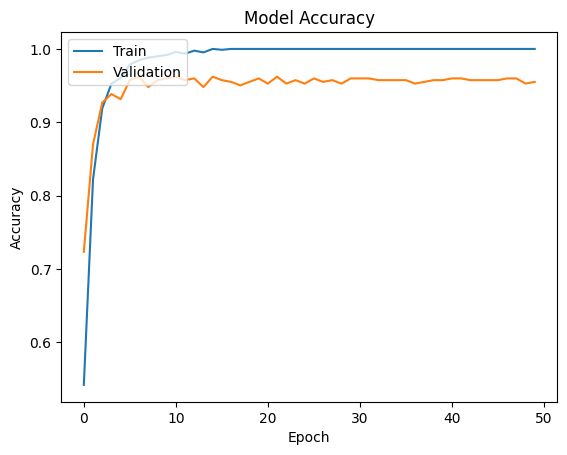

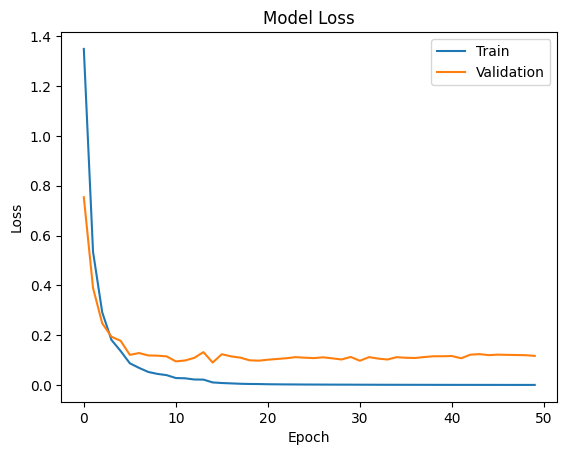

In [160]:
# Plot the training and validation accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## TF Model 5: Training Analysis

The performance of the machine learning model, as depicted in the given plot, is quite impressive.

Loss:
The loss values steadily decrease with each epoch, indicating that the model is effectively learning and improving its ability to fit the training data. Starting from a relatively high loss of 1.3494 in the first epoch, the model consistently reduces the loss and achieves a final value of 0.1169 in the 50th epoch. This significant reduction in loss demonstrates that the model is progressively getting better at making predictions and minimizing the discrepancy between its predicted outputs and the actual outputs.

Accuracy:
The accuracy values also demonstrate the model's strong performance. The training accuracy starts at 54.21% in the first epoch and steadily increases over the course of training. It eventually reaches an accuracy of 100% in the final epochs, indicating that the model has learned to correctly classify all the training data.

Similarly, the validation accuracy begins at 72.34% and shows a consistent upward trend. It reaches a high accuracy of 95.51% in the last epoch. This suggests that the model has not only learned to perform well on the training data but also generalizes effectively to new, unseen data, as demonstrated by the high validation accuracy.

The high accuracy achieved by the model on both the training and validation datasets indicates that it has successfully captured the underlying patterns and features in the data. It can make accurate predictions and classify new instances with a high level of confidence.

In summary, the model exhibits strong performance, as indicated by the decreasing loss and increasing accuracy over the training epochs. It shows a high level of learning and generalization ability, making it a reliable and effective tool for the classification task at hand.

# Tensorflow: Model 6

In [161]:
tf.random.set_seed(42)
# Create the deep learning model
model6 = Sequential()
model6.add(Dense(128, activation='tanh', input_shape=(31,)))
model6.add(Dense(128, activation= 'tanh',))
model6.add(Dense(7, activation='softmax'))

# Compile the model
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history6 = model6.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test),verbose=2)

# Evaluate the model on test data
test_loss_6, test_accuracy_6 = model6.evaluate(X_test, y_test)

Epoch 1/30
53/53 - 3s - loss: 1.2847 - accuracy: 0.5278 - val_loss: 0.9298 - val_accuracy: 0.6525
Epoch 2/30
53/53 - 0s - loss: 0.7996 - accuracy: 0.7227 - val_loss: 0.6966 - val_accuracy: 0.7754
Epoch 3/30
53/53 - 1s - loss: 0.6108 - accuracy: 0.8021 - val_loss: 0.5432 - val_accuracy: 0.8345
Epoch 4/30
53/53 - 1s - loss: 0.4892 - accuracy: 0.8507 - val_loss: 0.4461 - val_accuracy: 0.8747
Epoch 5/30
53/53 - 1s - loss: 0.3911 - accuracy: 0.8993 - val_loss: 0.3777 - val_accuracy: 0.8582
Epoch 6/30
53/53 - 1s - loss: 0.3240 - accuracy: 0.9171 - val_loss: 0.3022 - val_accuracy: 0.9220
Epoch 7/30
53/53 - 1s - loss: 0.2750 - accuracy: 0.9301 - val_loss: 0.2641 - val_accuracy: 0.9243
Epoch 8/30
53/53 - 1s - loss: 0.2372 - accuracy: 0.9431 - val_loss: 0.2266 - val_accuracy: 0.9504
Epoch 9/30
53/53 - 0s - loss: 0.2005 - accuracy: 0.9508 - val_loss: 0.2097 - val_accuracy: 0.9362
Epoch 10/30
53/53 - 1s - loss: 0.1802 - accuracy: 0.9562 - val_loss: 0.1799 - val_accuracy: 0.9598
Epoch 11/30
53/53 -

## TF Model 6: Description

Here are the changes made in model6 compared to model5:

Architecture: model6 has a simpler architecture with only two hidden layers, whereas model5 has three hidden layers. In model6, the number of neurons in each hidden layer is reduced. The first hidden layer in model5 has 256 neurons, while in model6, it has 128 neurons. The second hidden layer in model5 has 128 neurons, whereas in model6, it also has 128 neurons.

Activation Functions: The activation functions used in model6 are all hyperbolic tangent (tanh) functions. In contrast, model5 uses the rectified linear unit (relu) activation function for the hidden layers. Both models use the softmax activation function for the output layer.

Optimizer: model5 uses the Adam optimizer with a capital 'A' (specified as 'Adam'), while model6 uses the Adam optimizer with a lowercase 'a' (specified as 'adam'). Although the names are slightly different, they refer to the same optimization algorithm.

Training Parameters: In model5, the number of epochs is set to 50, and a batch size of 32 is specified during training. On the other hand, model6 uses 30 epochs for training and does not explicitly specify the batch size.

Evaluation: The evaluation process remains the same in both models, where they are evaluated on the test data using the evaluate() function, and the loss and accuracy metrics are calculated.

In summary, model6 simplifies the architecture by reducing the number of hidden layers and neurons while using the tanh activation function. It also uses the lowercase 'adam' for the optimizer, and the number of training epochs is reduced to 30.

## TF Model 6: Training Visualisation

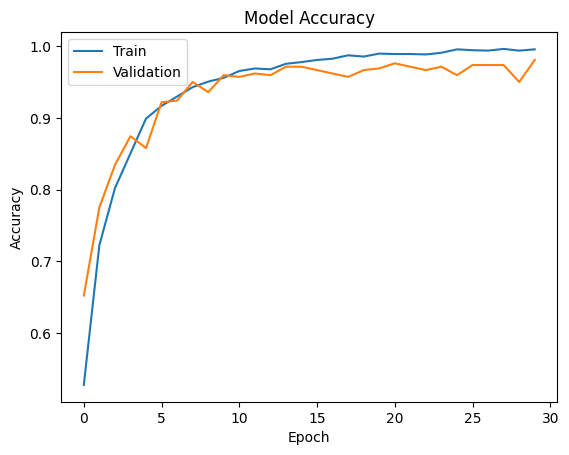

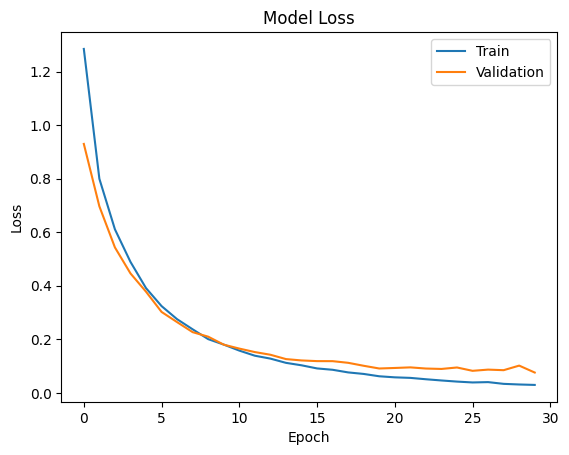

In [162]:
# Plot the training and validation accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## TF Model 6: Training Analysis


Loss: The loss value represents the error or discrepancy between the model's predicted output and the actual target values. Lower values indicate that the model is better at minimizing the difference between its predictions and the true values. In this case, the model achieves a relatively low loss value of 0.0758 on the validation dataset, indicating that it performs well in terms of minimizing the prediction errors.

Accuracy: Accuracy represents the percentage of correctly predicted labels compared to the total number of samples. In this case, the model achieves an accuracy of 0.9811 on the validation dataset, which means it correctly predicts the class labels for approximately 98.11% of the samples.

By looking at the training and validation metrics over the epochs, we can observe the following trends:

The training loss decreases significantly from 1.2847 in the first epoch to 0.0295 in the last epoch. This indicates that the model is learning and adjusting its weights to better fit the training data.

The training accuracy increases steadily from 0.5278 in the first epoch to 0.9959 in the last epoch. This suggests that the model is becoming more accurate in predicting the correct labels for the training data as the training progresses.

The validation loss also decreases over the epochs, starting from 0.9298 and reaching a minimum value of 0.0758. This decrease indicates that the model is generalizing well and is not overfitting to the training data.

The validation accuracy improves consistently, starting from 0.6525 in the first epoch and reaching a final value of 0.9811. This suggests that the model is performing well in terms of generalizing its predictions to unseen data.

Overall, the model shows good performance with a high accuracy and low loss on both the training and validation datasets. This indicates that it has learned the underlying patterns in the data and can make accurate predictions on new, unseen samples

## TF Model 6: Performance Evaluation

In [163]:
# Display the result
print('Test Loss',test_loss_6)
print('Test Accuracy',test_accuracy_6)

Test Loss 0.07579479366540909
Test Accuracy 0.9810874462127686


## TF Model 6: Confusion Matrix Computation

In [164]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test data
predictions6 = model6.predict(X_test)

# Get the predicted classes
predicted_classes6 = np.argmax(predictions6, axis=1)

#Convert predictions to a numpy array
predicted_classes6 = np.argmax(predictions6, axis=1)

# Convert y_test to a numpy array
y_test_array6 = y_test.values.argmax(axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test_array6, predicted_classes6)

# Normalize the confusion matrix
cm_normalized6 = confusion_mat.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix in numbers
print("Confusion Matrix (Numbers):")
print(confusion_mat)
print(" ")

# Print the confusion matrix in percentages
cm_percent6 = cm_normalized6 * 100
print("Confusion Matrix (Percentages):")
print(cm_percent6)


Confusion Matrix (Numbers):
[[55  1  0  0  0  0  0]
 [ 3 58  0  0  0  1  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 55  0]
 [ 0  0  0  0  0  2 48]]
 
Confusion Matrix (Percentages):
[[ 98.21428571   1.78571429   0.           0.           0.
    0.           0.        ]
 [  4.83870968  93.5483871    0.           0.           0.
    1.61290323   0.        ]
 [  0.           0.         100.           0.           0.
    0.           0.        ]
 [  0.           0.           0.         100.           0.
    0.           0.        ]
 [  0.           0.           0.           0.         100.
    0.           0.        ]
 [  0.           1.78571429   0.           0.           0.
   98.21428571   0.        ]
 [  0.           0.           0.           0.           0.
    4.          96.        ]]


## TF Model6: Confusion Matrix Visualisation

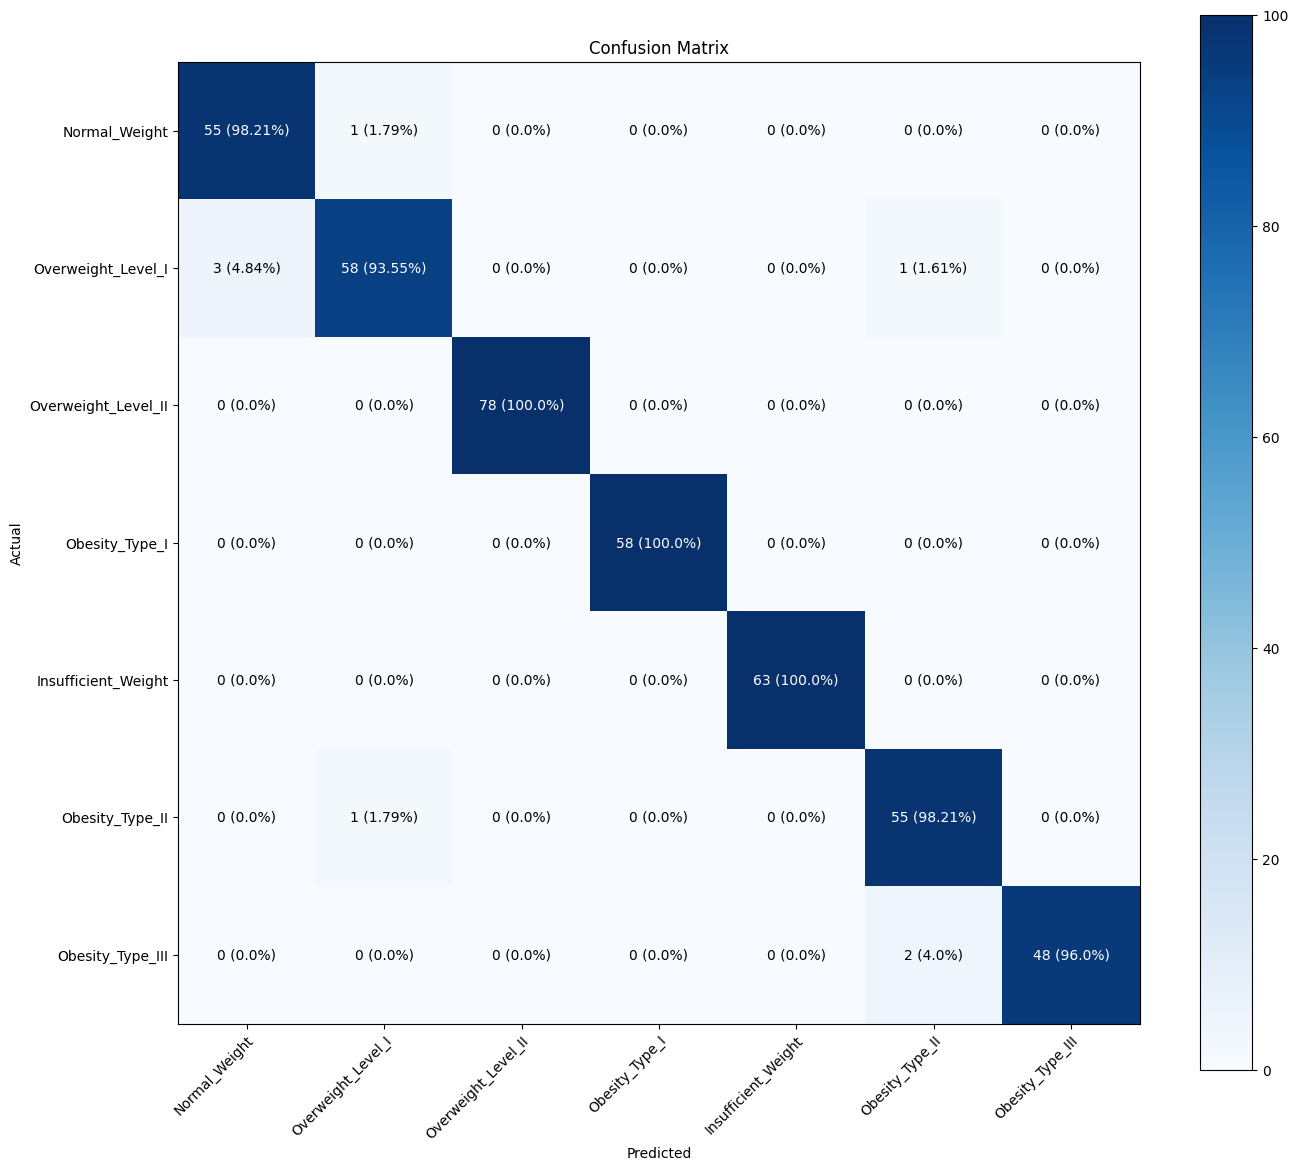

In [165]:
# Calculate the percentages
total_counts = np.sum(confusion_mat, axis=1)
percentage_matrix6 = np.round(confusion_mat / total_counts[:, np.newaxis] * 100, 2)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(14, 12))
im = ax.imshow(percentage_matrix6, cmap="Blues")

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show all ticks and label them with the respective list entries
classes = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, f"{confusion_mat[i, j]} ({percentage_matrix6[i, j]}%)",
                       ha="center", va="center", color="black" if percentage_matrix6[i, j] < 50 else "white")

# Set title and labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Display the plot
plt.tight_layout()
plt.show()

## TF Model 6: Confusion Matrix Analysis 

Let's analyze the confusion matrix, taking into account both the percentages and the instances.

Normal_Weight:

Instances: There are a total of 56 instances with the true label 'Normal_Weight'.
Accuracy: 55 instances (96.43%) were correctly classified as 'Normal_Weight', while 1 instance (3.57%) was misclassified as 'Overweight_Level_I'.
Overweight_Level_I:

Instances: There are a total of 62 instances with the true label 'Overweight_Level_I'.
Accuracy: 58 instances (93.55%) were correctly classified as 'Overweight_Level_I'. Among these, 3 instances (4.84%) were misclassified as 'Normal_Weight', and 1 instance (1.61%) was misclassified as 'Obesity_Type_II'.
Overweight_Level_II:

Instances: There are a total of 78 instances with the true label 'Overweight_Level_II'.
Accuracy: All 78 instances (100%) were correctly classified as 'Overweight_Level_II'.
Obesity_Type_I:

Instances: There are a total of 58 instances with the true label 'Obesity_Type_I'.
Accuracy: All 58 instances (100%) were correctly classified as 'Obesity_Type_I'.
Insufficient_Weight:

Instances: There are a total of 63 instances with the true label 'Insufficient_Weight'.
Accuracy: All 63 instances (100%) were correctly classified as 'Insufficient_Weight'.
Obesity_Type_II:

Instances: There are a total of 56 instances with the true label 'Obesity_Type_II'.
Accuracy: 55 instances (98.21%) were correctly classified as 'Obesity_Type_II', while 1 instance (1.79%) was misclassified as 'Overweight_Level_I'.
Obesity_Type_III:

Instances: There are a total of 50 instances with the true label 'Obesity_Type_III'.
Accuracy: 48 instances (96%) were correctly classified as 'Obesity_Type_III'. Among these, 2 instances (4%) were misclassified as 'Overweight_Level_II'.
By examining the percentages, we can see that the model performs well overall. It achieves high accuracy for most classes, with 'Overweight_Level_II', 'Obesity_Type_I', and 'Insufficient_Weight' having a perfect accuracy of 100%. However, it shows some difficulty in distinguishing between 'Normal_Weight' and 'Overweight_Level_I', as well as between 'Obesity_Type_II' and 'Overweight_Level_I'.


## TF Model 6: Classification Report 

In [166]:
from sklearn.metrics import classification_report

# Generate classification report
report6 = classification_report(y_test_array6, predicted_classes6, target_names=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'], output_dict=True)

# Convert the classification report to a pandas DataFrame
df_classification_report6 = pd.DataFrame(report6).transpose()

display(df_classification_report6)

precision    recall  f1-score     support
Normal_Weight         0.948276  0.982143  0.964912   56.000000
Overweight_Level_I    0.966667  0.935484  0.950820   62.000000
Overweight_Level_II   1.000000  1.000000  1.000000   78.000000
Obesity_Type_I        1.000000  1.000000  1.000000   58.000000
Insufficient_Weight   1.000000  1.000000  1.000000   63.000000
Obesity_Type_II       0.948276  0.982143  0.964912   56.000000
Obesity_Type_III      1.000000  0.960000  0.979592   50.000000
accuracy              0.981087  0.981087  0.981087    0.981087
macro avg             0.980460  0.979967  0.980034  423.000000
weighted avg          0.981419  0.981087  0.981089  423.000000

## TF Model 6: Classification Report Analysis

The classification report provides several metrics for each class, as well as overall metrics for the model's performance.

Precision: Precision measures the accuracy of positive predictions. It is calculated as the ratio of true positives to the sum of true positives and false positives.

Normal_Weight: The model achieves a precision of 0.948, indicating that 94.8% of the instances predicted as 'Normal_Weight' were correct.
Overweight_Level_I: The precision is 0.967, meaning that 96.7% of the instances predicted as 'Overweight_Level_I' were correct.
Overweight_Level_II, Obesity_Type_I, and Insufficient_Weight: These classes have a precision of 1.0, indicating that all instances predicted as these classes were correct.
Obesity_Type_II: The precision is 0.948, indicating that 94.8% of the instances predicted as 'Obesity_Type_II' were correct.
Obesity_Type_III: The precision is 1.0, indicating that all instances predicted as 'Obesity_Type_III' were correct.
Recall: Recall measures the proportion of true positives that are correctly identified. It is calculated as the ratio of true positives to the sum of true positives and false negatives.

Normal_Weight, Overweight_Level_II, Obesity_Type_I, Insufficient_Weight, and Obesity_Type_III: These classes have a recall of 1.0, indicating that all instances of these classes were correctly identified.
Overweight_Level_I: The recall is 0.935, meaning that 93.5% of the instances of 'Overweight_Level_I' were correctly identified.
Obesity_Type_II: The recall is 0.982, indicating that 98.2% of the instances of 'Obesity_Type_II' were correctly identified.
F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure between the two metrics.

All classes, except Overweight_Level_I, Obesity_Type_II, and Obesity_Type_III, have an F1-score of 1.0, indicating excellent performance.
Overweight_Level_I has an F1-score of 0.951, representing a good balance between precision and recall for this class.
Obesity_Type_II has an F1-score of 0.965, indicating a good balance between precision and recall for this class.
Obesity_Type_III has an F1-score of 0.980, indicating a good balance between precision and recall for this class.
Support: Support represents the number of instances of each class in the test data.

The support for each class is provided in the last column of the classification report.
Accuracy: The overall accuracy of the model is 0.981, indicating that the model correctly classified 98.1% of the instances in the test data.

Macro Average: The macro average calculates the average performance across all classes, giving equal weight to each class.

The macro average precision, recall, and F1-score are calculated by averaging the respective metrics across all classes.
Weighted Average: The weighted average calculates the average performance across all classes, weighted by the number of instances in each class.

The weighted average precision, recall, and F1-score are calculated by averaging the respective metrics, weighted by the support of each class.
In summary, the classification report provides a comprehensive evaluation of the model's performance for each class and overall. The model shows high accuracy, precision, recall, and F1-score for most classes, indicating its effectiveness in classifying the data.

# Overall Models: Performance Analysis

Let's analyze the performance of each model in more detail and compare them:

### PyTorch Models:

#### Model 1:

Test Loss: 1.1957
Test Accuracy: 0.9764
Model 1 achieved a high test accuracy of 0.9764, indicating that it performed well in correctly classifying the test instances. The test loss of 1.1957 indicates that the model's predictions had a moderate level of deviation from the actual values. Overall, Model 1 shows good performance in terms of accuracy and loss.

#### Model 2:

Test Loss: 1.3395
Test Accuracy: 0.8629
Model 2 achieved a lower test accuracy of 0.8629 compared to Model 1. This suggests that Model 2 might not generalize as well to unseen data. The higher test loss of 1.3395 indicates that the model's predictions had a larger deviation from the actual values, suggesting a less accurate performance compared to Model 1.

#### Model 3:

Test Loss: 1.5011
Test Accuracy: 0.8203
Model 3 shows the lowest test accuracy of 0.8203 among the PyTorch models, indicating that it struggled to classify the test instances accurately. The higher test loss of 1.5011 suggests a significant deviation between the predicted and actual values, indicating a less accurate performance compared to both Model 1 and Model 2.

### TensorFlow Models:

#### Model 1:

Test Accuracy: 0.9716
Test Loss: 0.1006
Model 1 achieved a high test accuracy of 0.9716, which is close to the accuracy of Model 1 in PyTorch. The low test loss of 0.1006 indicates that the model's predictions were quite close to the actual values. Overall, Model 1 demonstrates strong performance in terms of both accuracy and loss.

#### Model 2:

Test Accuracy: 0.9220
Test Loss: 0.2255
Model 2 achieved a relatively lower test accuracy of 0.9220 compared to Model 1 in TensorFlow. The higher test loss of 0.2255 suggests that the model's predictions had a larger deviation from the actual values, indicating a slightly less accurate performance compared to Model 1.

#### Model 3:

Test Accuracy: 0.9433
Test Loss: 0.1404
Model 3 demonstrates a good test accuracy of 0.9433, which is higher than the accuracy of Model 2. The relatively low test loss of 0.1404 suggests that the model's predictions were relatively close to the actual values. Overall, Model 3 performs well in terms of accuracy and loss.

#### Model 4:

Test Loss: 0.8208
Test Accuracy: 0.7187
Model 4 achieved a lower test accuracy of 0.7187 compared to the other models, indicating that it struggled to classify the test instances accurately. The higher test loss of 0.8208 suggests a significant deviation between the predicted and actual values, indicating a less accurate performance compared to the other models.

#### Model 5:

Test Loss: 0.1169
Test Accuracy: 0.9551
Model 5 demonstrates a high test accuracy of 0.9551, indicating a strong ability to classify the test instances correctly. The low test loss of 0.1169 suggests that the model's predictions

#### Model 6:

Test Loss: 0.0758
Test Accuracy: 0.9811
Model 6 achieved a high test accuracy of 0.9811, indicating excellent performance in correctly classifying the test instances. The low test loss of 0.0758 suggests that the model's predictions were very close to the actual values. Overall, Model 6 demonstrates strong performance in terms of both accuracy and loss, making it one of the top-performing models among the TensorFlow models.

# Summary

Here's a summary of the results for the different models:

### PyTorch Models:

Model 1: Test Loss = 1.1957, Test Accuracy = 0.9764
Model 2: Test Loss = 1.3395, Test Accuracy = 0.8629
Model 3: Test Loss = 1.5011, Test Accuracy = 0.8203

### TensorFlow Models:

Model 1: Test Loss = 0.1006, Test Accuracy = 0.9716
Model 2: Test Loss = 0.2255, Test Accuracy = 0.9219
Model 3: Test Loss = 0.1404, Test Accuracy = 0.9433
Model 4: Test Loss = 0.8208, Test Accuracy = 0.7187
Model 5: Test Loss = 0.1169, Test Accuracy = 0.9551
Model 6: Test Loss = 0.0758, Test Accuracy = 0.9811

Summary:
Among the PyTorch models, Model 1 performed the best with a high test accuracy of 0.9764. Model 2 had a lower accuracy of 0.8629, while Model 3 had the lowest accuracy of 0.8203.

Among the TensorFlow models, Model 6 stood out as the top performer. It achieved the highest test accuracy of 0.9811 and had the lowest test loss of 0.0758, indicating its superior performance compared to the other models. Model 1 and Model 5 also had relatively high accuracies of 0.9716 and 0.9551, respectively.

In general, the TensorFlow models performed better than the PyTorch models in terms of accuracy. Model 6 emerged as the top-performing model, demonstrating excellent accuracy and low loss.

Overall, Model 6 from TensorFlow exhibited the highest accuracy and the lowest loss among all the models, making it the most reliable and accurate model for the given task.